## **ANALYSIS OF CARD SORTING FOR MOVEMENT PERCEPTION**

The sentences that were given to the participants for grouping were : 
- Rate_your_sensation_of_self_motion
- Rate_your_sensation_of_movement
- Rate_how_fast_you_think_you_are_moving
- Rate_how_fast_you_are_moving
- Rate_your_speed
- Rate_how_fast_you_are_going
- Rate_how_fast_the_train_is_moving
- Rate_the_speed_of_the_train
- Rate_the_velocity_of_the_train
- Rate_how_intense_your_sensation_of_motion_is
- Rate_how_strong_is_your_sensation_of_self_motion
- Rate_the_intensity_of_your_perception_of_self_motion
- Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment
- Rate_your_perception_of_speed
- Rate_your_perceived_motion
- Rate_your_perception_of_self_motion
- Rate_your_perceived _movement

# Data Pre-Processing

***Importing the necessary packages in python***

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import collections
from collections import Counter

***The data of the survey is fetched and  stored in "surveyData"***

In [122]:
dataset_path = 'results-survey173122.csv' 
surveyData = pd.read_csv(dataset_path,encoding = "ISO-8859-1")

***Checking all the columns/features of the survey dataset and its description.***



In [123]:
surveyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 33 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Response ID                                                                     48 non-null     int64  
 1   Age                                                                             48 non-null     object 
 2   Gender                                                                          48 non-null     object 
 3   Level_of_English                                                                48 non-null     object 
 4   Play_video_games                                                                47 non-null     object 
 5   Use_VR_apps_with_whd                                                            48 non-null     object 
 6   Rate_your_sensation_

- **Response ID** : Represents the individual participant number. 
- **Age** : Represents the age of the individual participants in terms of ranges
- **Gender** : Represents the gender of the individual participant.
- **Level of English** : Represents the Level of English , which is A1 - Beginner , A2 , B1 (42 - 71 Tofel score) ,B2 (72 - 94 TOFEL score) , C1 (95 -120 TOFEL score) , C2 - Proficient / Mother tounge.
- **Play video games** : Represents how often the participant plays video game.
- **Use VR app with wearable headmounted display** : Represents if the participant has used a wearable headmounted display for any VR applications.
- **The Features from the number 6 -22** : Sentences for card sorting, that the participants are asked to categorise into groups ranging from 1 - 10.
-**Features from the number 23 -32** : Represents the justification provided by the participants for classifying to particular groups.


***Printing summary Statistics of all the features***

In [124]:
surveyData.describe()

Response ID  Rate_your_sensation_of_self_motion  ...  Group_9  Group_10
count        48.00                           48.000000  ...      0.0       0.0
mean         24.50                            3.020833  ...      NaN       NaN
std          14.00                            1.279787  ...      NaN       NaN
min           1.00                            1.000000  ...      NaN       NaN
25%          12.75                            2.000000  ...      NaN       NaN
50%          24.50                            3.000000  ...      NaN       NaN
75%          36.25                            4.000000  ...      NaN       NaN
max          48.00                            6.000000  ...      NaN       NaN

[8 rows x 21 columns]

***Renaming the column "Response ID"  to  "Participant_No"***



In [125]:
surveyData.rename(columns = {"Response ID": "Participant_No"}, inplace=True)
surveyData.head()

Participant_No                  Age  Gender  ... Group_8 Group_9 Group_10
0               1  25 â 34 years old    Male  ...     NaN     NaN      NaN
1               2  35 â 44 years old    Male  ...     NaN     NaN      NaN
2               3  35 â 44 years old  Female  ...     NaN     NaN      NaN
3               4  25 â 34 years old    Male  ...     NaN     NaN      NaN
4               5  35 â 44 years old  Female  ...     NaN     NaN      NaN

[5 rows x 33 columns]

As we can see , there are some unwanted charaters present in the data , in the column Age such as 'â' which will cause issues during data processing .

Cleaning the column **"Age"**

***Replacing irrelevant characters in the column Age***

In [126]:
surveyData.Age.replace({'25  34 years old': '25-34 years', '18  24 years old': '18-24 years', '45  54 years old': '45-54 years',
    '35  44 years old': '35-44 years', '35 â 44 years old': '35-44 years', '25 â 34 years old': '25-34 years', '55  64 years old': '55-64 years', '65  74 years old': '65-74 years'}, inplace=True)


***Checking if the characters have been replaced***

In [127]:
surveyData['Age'].value_counts()


25-34 years      17
18-24 years      13
35-44 years       8
45-54 years       6
55-64 years       2
75+ years old     1
65-74 years       1
Name: Age, dtype: int64

***Handling missing data***

Checking for the number of missing calues in each of the columns

**Replacing all the 17 statements as s1 -s17** 

In [128]:
#columns_to_drop=['Rate_your_sensation_of_self_motion', 'Rate_your_sensation_of_movement', 'Rate_how_fast_you_think_you_are_moving', 'Rate_how_fast_you_are_moving', 'Rate_your_speed', 'Rate_how_fast_you_are_going', 'Rate_how_fast_the_train_is_moving', 'Rate_the_speed_of_the_train', 'Rate_the_velocity_of_the_train', 'Rate_how_intense_your_sensation_of_motion_is', 'Rate_how_strong_is_your_sensation_of_self_motion', 'Rate_the_intensity_of_your_perception_of_self_motion', 'Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment', 'Rate_your_perception_of_speed', 'Rate_your_perceived_motion', 'Rate_your_perception_of_self_motion', 'Rate_your_perceived _movement' ]
#test1.drop(columns_to_drop, axis=1, inplace=True)
surveyData.rename(columns = {"Rate_your_sensation_of_self_motion": "S1", "Rate_your_sensation_of_movement": "S2", "Rate_how_fast_you_think_you_are_moving": "S3", "Rate_how_fast_you_are_moving": "S4", "Rate_your_speed": "S5"}, inplace=True)

In [129]:

surveyData.rename(columns = {"Rate_how_fast_you_are_going": "S6", "Rate_how_fast_the_train_is_moving": "S7", "Rate_the_speed_of_the_train": "S8", "Rate_the_velocity_of_the_train": "S9", "Rate_how_intense_your_sensation_of_motion_is": "S10"}, inplace=True)

In [130]:

surveyData.rename(columns = {"Rate_how_strong_is_your_sensation_of_self_motion": "S11", "Rate_the_intensity_of_your_perception_of_self_motion": "S12", "Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment": "S13", "Rate_your_perception_of_speed": "S14", "Rate_your_perceived_motion": "S15", "Rate_your_perception_of_self_motion": "S16", "Rate_your_perceived _movement": "S17"}, inplace=True)

In [131]:
surveyData.isna().sum()

Participant_No           0
Age                      0
Gender                   0
Level_of_English         0
Play_video_games         1
Use_VR_apps_with_whd     0
S1                       0
S2                       0
S3                       0
S4                       0
S5                       0
S6                       0
S7                       0
S8                       0
S9                       0
S10                      0
S11                      0
S12                      0
S13                      0
S14                      0
S15                      0
S16                      0
S17                      0
Group_1                  0
Group_2                  0
Group_3                  0
Group_4                 21
Group_5                 33
Group_6                 42
Group_7                 46
Group_8                 48
Group_9                 48
Group_10                48
dtype: int64

The columns **'Play_video_games'**  and  the columns from **'Group_4  -    Group_10'**  has missing values.

---



***Eliminating columns that have larger number of missing values.***

In [132]:
columns_to_drop=['Group_10']
surveyData.drop(columns_to_drop, axis=1, inplace=True)

In [133]:
columns_to_drop=['Group_9']
surveyData.drop(columns_to_drop, axis=1, inplace=True)

In [134]:
columns_to_drop=['Group_8']
surveyData.drop(columns_to_drop, axis=1, inplace=True)

In [135]:
surveyData.to_csv('ProcessedData.csv', index=False)

Since the dataset contains categorical based values , missing values can be handled by making that particular missing value as another category amoung the categories or by building a model to predict the category of the missing value.

For the feature **"how often do you play video games"** it is found that there are three categories identified based on the participant's input, as shown below:


In [136]:
surveyData['Play_video_games'].value_counts()

Never                       19
More than 3 times a week    16
Less than 3 times a week    12
Name: Play_video_games, dtype: int64

In [137]:
surveyData.Play_video_games.fillna('Never', inplace=True)

Since this feature has only one missing value, it can be replaced with the most categorized value , i.e. **Never** which is inputted most by the participants compared to the other options.

***Checking other features for missing values***

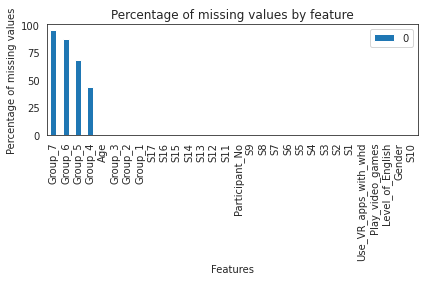

In [138]:
pd.DataFrame(surveyData.isnull().sum()/len(surveyData)*100).nlargest(600,columns=0).plot(kind="bar") 
plt.rcParams["figure.figsize"] = [15, 11] #10,6
plt.title("Percentage of missing values by feature")
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")
plt.tight_layout()

Features that have more than **80%** missing values are deleted , which are **Group 7 and Group 6** , which arent usefull in processing the data.

In [139]:
columns_to_drop=['Group_7']
surveyData.drop(columns_to_drop, axis=1, inplace=True)

In [140]:
columns_to_drop=['Group_6']
surveyData.drop(columns_to_drop, axis=1, inplace=True)

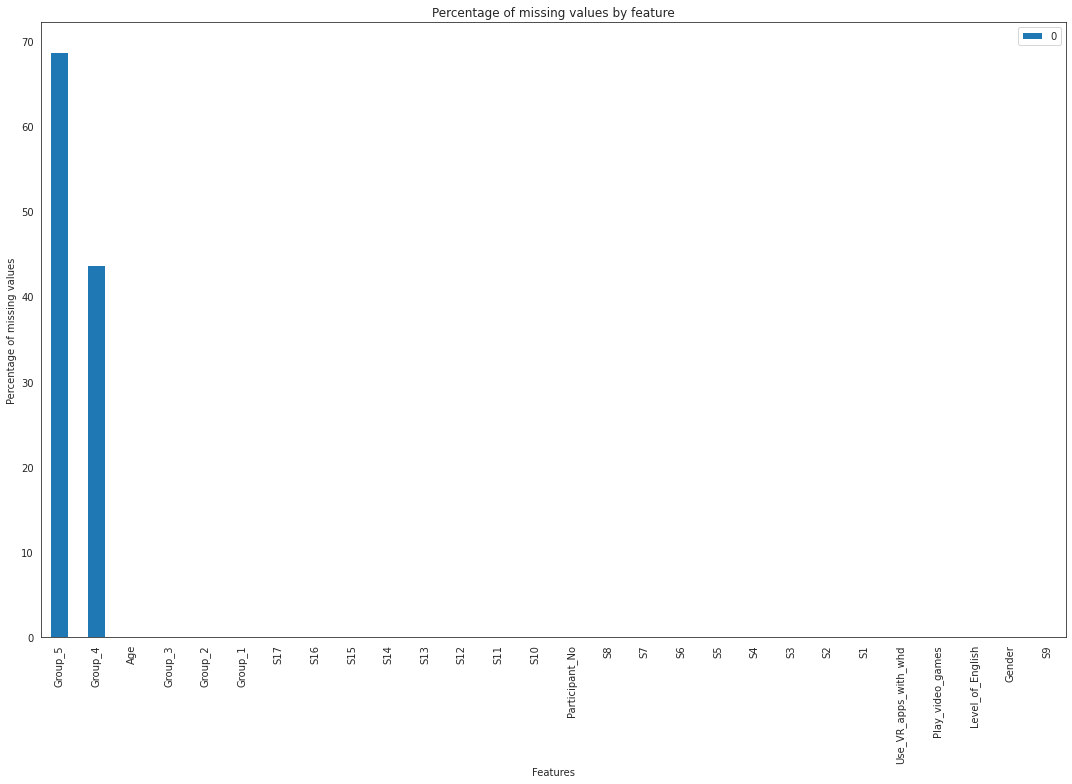

In [141]:
#pd.DataFrame(surveyData.isnull().sum()/len(surveyData)*100).nlargest(5,columns =0).plot(kind="pie",subplots=True) 
#plt.title("Percentage of missing values by feature")
#plt.tight_layout()
pd.DataFrame(surveyData.isnull().sum()/len(surveyData)*100).nlargest(600,columns=0).plot(kind="bar") 
plt.rcParams["figure.figsize"] = [15, 11] #10,6
plt.title("Percentage of missing values by feature")
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")
plt.tight_layout()

We can conclude that the main groups with the participants justification is **Group 1 , Group 2 and Group 3**, that does not have any missing values. 


---



***Removing the null values from Group 4 and Group 5 , the remaining values are used for further processing.***

In [142]:
surveyData.Group_4.dropna(inplace= True)

Checking if all the missing values have been removed

In [143]:
surveyData.Group_4

0     This group has to do with how your motion make...
3     A mix between group 1 and 2 but doesn't fit in...
6     more about the feeling of motion intensity ins...
7     These sentences are all about my perception of...
8     I grouped these sentences together based on in...
10                       All about the trains movement.
12      it is about how strong your feeling of speed is
16                                    Personal movement
17    describes the extent to which one believes the...
18                    Decision making about train speed
19       asking you be to be subjective about the speed
21                About the intensity of the perception
22                             perpception of intensity
25    Here I am being asked about how intense the fe...
26    Sentences that relate to how a person senses t...
27                                          Self motion
28    Measuring the sensation of the movement rather...
29    Here I am rating the movement I thought to

In [144]:
surveyData.Group_5.dropna(inplace= True)

Checking if all the missing values have been removed

In [145]:
surveyData.Group_5

0     This group has to do with your understanding o...
3     This is about what movement you're actually fe...
12                           it is about your sensation
16                                                Speed
17                    describes the feeling of movement
18         Decision making about my perception of speed
21    Similar to Group 3 - rating what?  Your percep...
22     perception of own movement, not limited to speed
26    General sentences relating to how a person sen...
27                                                    -
31    quality of the sensation of movement in more g...
32                                   Similar ro group 3
34    Same as 3 but more general to sensing movement...
41     perceived own motion (acknowledges subjectivity)
42    you ask about self-motion here, which is a spe...
Name: Group_5, dtype: object

# Exploratory Data Analysis

As illustated in the PercentageTable1 attached in the Github repo ,For all the participants, the percentage of participants are calculated using the excel formula, for categorising into particular groups. 
- Green color indicates the highest percentage value of that column representing the sentences.
- Red indicates the lowest value which cannot be considered. 
- Blue indicates a value which falls within the set threshold limit .i.e. 20% , and can be considered.


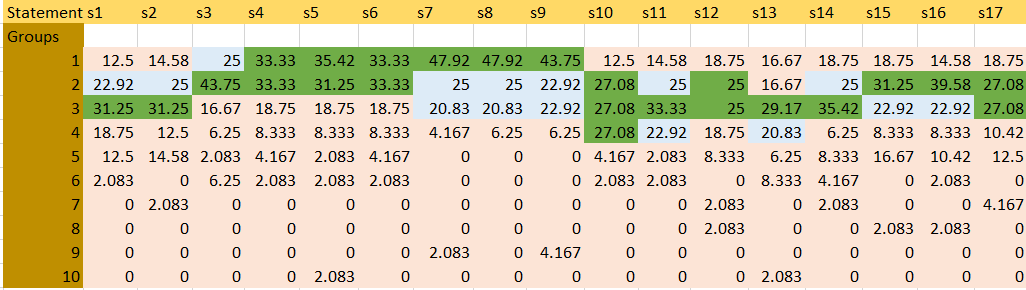

**The  main groups are identified as Group 1 , Group 2 , Group 3 , based on the percentage values**

From the percentage values taken rowise from the first column Groups, considering only the green and blues values , following was obtained: 


- **GROUP 1** : s7 , s8 , s9 , s5 , s4 , s6 , s3

- **GROUP 2**: s3, s16 , s4 , s6 ,s5, s15 , s10 , s17 ,s2,s3,s7,s8,s11,s12,s14,s1 ,s9.

- **GROUP 3**: s14 , s11 , s13 , s10 , s17 , s12 ,s9 , s15 , s16, s7 , s8

- **GROUP 4**: s10 , s11 , s13




---


Forming categories from the above groups:


---



- **Category A** (Common to Group 1&2) : s7 , s8 , s9, s5, s4, s6, s3
- **Category B** (Common to Group 2&3): s14 , s11 , s10 , s17 , s12 , s9 , s15, s16 , s7 , s8.
- **Category C** (Common to group 3&4): s10 , s11 , s13
- **Category D**( Common to Group 1&3) : s8 , s9 , s7 , 
- **Category E** ( Common to group 2&4) : s10 , s11

Based on the categories formed above , it is observed that : 


---

- In **68.72%** of the participants, all the statements of Category A were grouped together.
 Which is :
 - Rate_how_fast_the_train_is_moving
 - Rate_the_speed_of_the_train
 - Rate_the_velocity_of_the_train
 - Rate_your_speed
 - Rate_how_fast_you_are_moving
 - Rate_how_fast_you_are_going
 - Rate_how_fast_you_think_you_are_moving


---

- In **54.82 %** of the participants, all the statements of Category B were grouped together.
Which is:
 - Rate_the_intensity_of_your_perception_of_self_motion
 - Rate_how_strong_is_your_sensation_of_self_motion
 - Rate_how_intense_your_sensation_of_motion_is
 - Rate_your_perceived _movement
 - Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment
 - Rate_the_velocity_of_the_train
 - Rate_your_speed
 - Rate_your_perception_of_self_motion
 - Rate_how_fast_the_train_is_moving
 - Rate_the_speed_of_the_train


---

- In **53.47%** of the participants, all the statements of Category C were grouped together.
Which is:
 - Rate_how_intense_your_sensation_of_motion_is
 - Rate_how_strong_is_your_sensation_of_self_motion
 - Rate_your_perception_of_speed



---

- In **68.75%** of the participants, all the statements of Category D were grouped together.
Which is:
 - Rate_the_speed_of_the_train
 - Rate_the_velocity_of_the_train
 - Rate_how_fast_the_train_is_moving


---
- In **53.22%** of the participants, all the statements of Category E were grouped together.
Which is :
- Rate_how_intense_your_sensation_of_motion_is
Rate_how_strong_is_your_sensation_of_self_motion

---



**From the percentage table** : 


---


We notice that S7 , S8 , S9 are commonly used in Group 1, 2,3 and it is noticed that in **92.36 %** of the participants , S7, S8 and S9 were grouped together , which is :  
- Rate_how_fast_the_train_is_moving 
- Rate_the_speed_of_the_train  
- Rate_the_velocity_of_the_train


---


Similarly , it is noticed that S10 , S11  are grouped together and are commonly found in Group 2, 3, 4. In **81.24%** of the participants S10 , S11 were grouped together , which is : 
- Rate_how_intense_your_sensation_of_motion_is
- Rate_how_strong_is_your_sensation_of_self_motion

---



UNDERSTANDING WHY THE PARTICIPANTS HAVE CLASSIFIED TO THE PARTICULAR GROUPS.

In [26]:
df = pd.DataFrame(surveyData)

**CATEGORY A** : Contains items common to Group 1 & Group 2 


---



Fetching the users justification for categorzing the statement "**Rate_how_fast_you_are_moving**" under **Group 1** and storing it in dataframe of dfgroup1.

In [27]:
dataframe_group1 = df.loc[df["S4"] == 1]
dfgroup1 = dataframe_group1["Group_1"]
dfgroup1

1        "contains items relating to speed of movement"
2     "All involve speed and velocity, most simple q...
4     "These instructions are based on the assumptio...
7          "These sentences are all about my own speed"
8     "I grouped them based on actual speed of the s...
10                          "All about personal speed."
11                    "The quantity of the "fastness"."
12                             "it is about you moving"
13                                    "Actual movement"
14    "These sentences would refer to concrete facts...
22    "quasi-objective measure of speed i am travell...
25    "Here I am being asked to estimate how fast I ...
33    "refers to the object moving (but I went with ...
35    "They all included the word fast and seems to ...
45    "Asked to rate how fast I was moving, at least...
46    "Imaginary movement of the imaginary me and im...
Name: Group_1, dtype: object

Similarly ,Fetching the users justification for categorzing the statement "**Rate_how_fast_you_are_moving**" under **Group 2** and storing it in dataframe of dfgroup2.

In [28]:
dataframe_group2 = df.loc[df["S4"] == 2]
dfgroup2 = dataframe_group2["Group_2"]

Fetching the users justification for categorzing the statement "**Rate_how_fast_you_are_going**" under **Group 1** and storing it in dataframe of dfgroup1_1.

In [29]:
dataframe_group1_1 = df.loc[df["S6"] == 1]
dfgroup1_1 = dataframe_group1_1["Group_1"]

Fetching the users justification for categorzing the statement "**Rate_how_fast_you_are_going**" under **Group 2** and storing it in dataframe of dfgroup2_1.

In [30]:
dataframe_group2_1 = df.loc[df["S6"] == 2]
dfgroup2_1 = dataframe_group2_1["Group_2"]

Fetching the users justification for categorzing the statement "**Rate_how_fast_you_think_you_are_moving**" under **Group 1** and storing it in dataframe of dfgroup1_0.

In [31]:
dataframe_group1_0 = df.loc[df["S3"] == 1]
dfgroup1_0 = dataframe_group1_0["Group_1"]

Fetching the users justification for categorzing the statement "**Rate_how_fast_you_think_you_are_moving**" under **Group 2** and storing it in dataframe of dfgroup2_0.

In [32]:
dataframe_group2_0 = df.loc[df["S3"] == 2]
dfgroup2_0 = dataframe_group2_0["Group_2"]

**NLP processing for the columns containing the participants justification.**

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')

#load tokenizer, stemmer and stop words
tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer() 
stop_words = set(stopwords.words('english'))
surveyData.Group_4.dropna(inplace= True)
surveyData.Group_5.dropna(inplace= True)
s1g1 = dfgroup1
s1g2 = dfgroup2
s2g1 = dfgroup1_1
s2g2 = dfgroup2_1
s3g1 = dfgroup1_0
s3g2 = dfgroup2_0
Statements = s1g1+s1g2+s2g1+s2g2+s3g1+s3g2
#convert values to list of lists

TS1 = s1g1.values.tolist() 
TS2 = s1g2.values.tolist() 
TS3 = s2g1.values.tolist() 
TS4 = s2g2.values.tolist() 
TS5 = s3g1.values.tolist() 
TS6 = s3g2.values.tolist() 


 #tokenize words in lists
tokens = [tokenizer.tokenize(str(i)) for i in TS1]
tokens1 = [tokenizer.tokenize(str(i)) for i in TS2] 
tokens2 = [tokenizer.tokenize(str(i)) for i in TS3]
tokens3 = [tokenizer.tokenize(str(i)) for i in TS4]
tokens4 = [tokenizer.tokenize(str(i)) for i in TS5] 
tokens5 = [tokenizer.tokenize(str(i)) for i in TS6] 

Tokens_all = tokens+tokens1+tokens2+tokens3+tokens4+tokens5

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.




---


***Identifying the most common phrases / keywords used by the participants.***


---



***Defining a function to convert any sentences to individual words***

In [34]:
def convert(lst): 
    return ' '.join(lst).split() 

***Converting the participant's comments of Group 1 to words and storing in the variable words_of_group1***

In [35]:
S1_G1 = convert(s1g1) 
S1_G2 = convert(s1g2)
S2_G1 = convert(s2g1) 
S2_G2 = convert(s2g2) 
S3_G1 = convert(s3g1) 
S3_G2 = convert(s3g2) 

s = S1_G1+S1_G2+S2_G2+S3_G1+S3_G2

***Obtaining the total counts of the words***

In [36]:
count_of_words = Counter(s)
print(count_of_words)

Counter({'the': 42, 'to': 32, 'of': 32, 'how': 26, 'are': 25, 'I': 24, 'fast': 24, 'speed': 21, 'you': 20, 'and': 18, 'a': 17, 'movement': 17, 'about': 15, 'is': 14, 'sentences': 13, 'all': 13, 'my': 11, 'moving': 11, 'that': 10, 'rating': 9, 'This': 9, 'own': 8, 'actual': 8, 'am': 8, 'on': 7, 'objective': 7, 'train': 7, 'like': 7, 'rate': 6, 'in': 6, 'refer': 6, 'going,': 6, 'group': 6, 'your': 6, 'perceive': 6, 'what': 6, '"These': 5, 'based': 5, 'felt': 5, 'estimate': 5, 'for': 5, 'rather': 5, 'than': 5, 'These': 5, 'ask': 5, 'movement"': 4, 'personal': 4, 'The': 4, 'at': 4, "It's": 4, 'How': 4, 'It': 4, 'sensation': 4, 'going': 4, "I'm": 4, 'or': 4, 'Personal': 4, '"you"': 4, 'moving.': 4, '"All': 3, 'simple': 3, 'motion': 3, 'would': 3, 'as': 3, '"Here': 3, 'which': 3, 'with': 3, 'moving,': 3, 'one,': 3, 'this': 3, 'we': 3, 'physical': 3, 'property': 3, 'yourself': 3, 'virtual': 3, 'space': 3, 'refers': 3, 'describes': 3, "one's": 3, 'related': 3, 'our': 3, 'Contains': 3, 'person'

***Plotting a bar graph for the 50 most commonly used words by the participants***

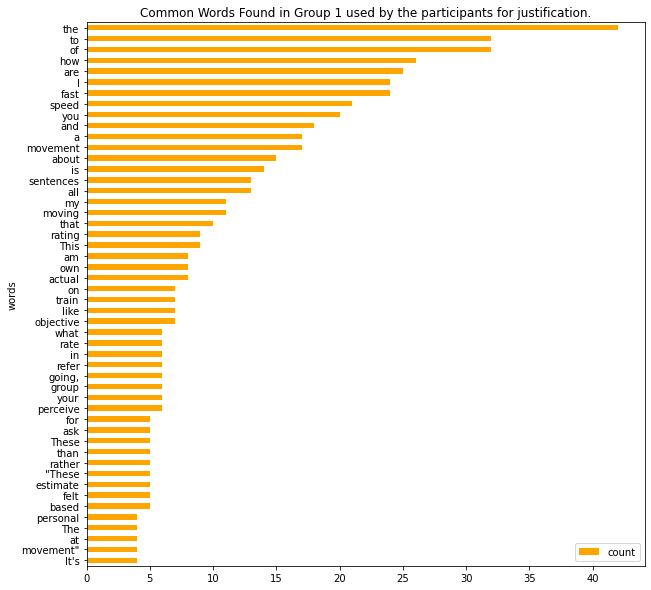

In [37]:
# Takes the Top 50 commonly used words
count_of_words.most_common(50)
words = pd.DataFrame(count_of_words.most_common(50),
                             columns=['words', 'count'])
words.head()
fig, ax = plt.subplots(figsize=(10,10 ))
words.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orange")
ax.set_title("Common Words Found in Group 1 used by the participants for justification.")
plt.show()

From the top 50 words , the key words extracted are **Fast** , **Speed** , **Movement** , **Moving** , **Rating**.

The total word count are :
- **Fast** :24 
- **Speed** : 21 
- **Movement** : 17
- **Moving** : 11 
- **Rating** : 9



---




CHECKING FOR CORRELATIONS BETWEEN THE FEATURES



---
**Obtaining the percentage table when checking the level of english , considering only C2 - Proficient / Mother tongue to check if it impacts the results, as illustated in the PercentageTable2 attached in the Github repo**


---



In [56]:
profiency = pd.DataFrame(surveyData)

**Fetching the participants with an English level of C2 - Proficient / Mother tounge.**

In [57]:
prof=profiency.loc[profiency["Level_of_English"] == "C2 - Proficient / Mother tongue"]
prof
#prof = profiency.loc[df["Level_of_English"] == "C2 - Proficient / Mother tongue" | df["Level_of_English"] == "C1 (95-120)"]
#prof

Participant_No  ...                                            Group_5
0                1  ...  This group has to do with your understanding o...
1                2  ...                                                NaN
2                3  ...                                                NaN
3                4  ...  This is about what movement you're actually fe...
4                5  ...                                                NaN
7                8  ...                                                NaN
8                9  ...                                                NaN
10              11  ...                                                NaN
12              13  ...                         it is about your sensation
13              14  ...                                                NaN
14              15  ...                                                NaN
15              16  ...                                                NaN
16              17  ...                                              Speed
17              18  ...                  describes the feeling of movement
18              19  ...       Decision making about my perception of speed
19              20  ...                                                NaN
20              21  ...                                                NaN
21              22  ...  Similar to Group 3 - rating what?  Your percep...
22              23  ...   perception of own movement, not limited to speed
25              26  ...                                                NaN
26              27  ...  General sentences relating to how a person sen...
27              28  ...                                                  -
28              29  ...                                                NaN
30              31  ...                                                NaN
31              32  ...  quality of the sensation of movement in more g...
34              35  ...  Same as 3 but more general to sensing movement...
35              36  ...                                                NaN
36              37  ...                                                NaN
38              39  ...                                                NaN
40              41  ...                                                NaN
41              42  ...   perceived own motion (acknowledges subjectivity)
42              43  ...  you ask about self-motion here, which is a spe...
43              44  ...                                                NaN
44              45  ...                                                NaN
45              46  ...                                                NaN
46              47  ...                                                NaN
47              48  ...                                                NaN

[37 rows x 28 columns]

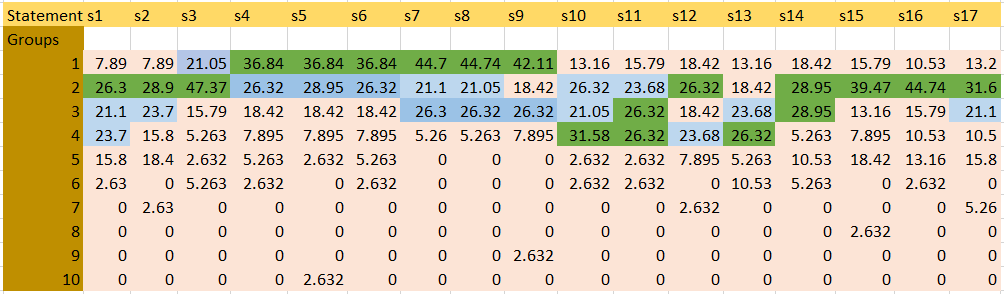

**The  main groups identified are Group 1 , Group 2 , Group 3 , Group 4**

The classified sentences have been grouped as shown below :

 - **GROUP 1:**
s7 , s8 , s9 ,s4 ,s5, s6 ,s3


- **GROUP 2:** s3, s16 , s15 , s17 , s2 , s4 , s5 , s6 , s10 , s12 , s7 , s8 ,s11
 
- **GROUP 3:** s14 ,s7 ,s8 ,s9 ,s11 ,s2 ,s13 ,s1 ,s17

- **GROUP 4:** s10 , s11 , s13 , s1 , s12


In [58]:
prof.to_csv('c2.csv', index=False)



---


The categories identified were as follows :


---



- **Category A** (Common to Group 1&2) : S7 , S8 , s4 , S5 , S6 , S3

- **Category B** (Common to Group 2&3): s17 , s2 , s7 , s8 , s11.

- **Category C** (Common to group 3&4): s11 , s13 

- **Category D**( Common to Group 1&3) : s7 , s8 , s9

- **Category E** ( Common to group 2,4) : s10 , s11 , s12




---


- In **65.34%** of the participants, all the statements of Category A were grouped together.
 Which is :
  - Rate_how_fast_you_think_you_are_moving
  - Rate_how_fast_you_are_moving
  - Rate_your_speed
  - Rate_how_fast_you_are_going
  -  Rate_how_fast_the_train_is_moving
  - Rate_the_speed_of_the_train


---


- In **50%** of the participants , all the statements of Category B were grouped together.
 Which is :
 - Rate_your_sensation_of_movement
 - Rate_how_fast_the_train_is_moving
 - Rate_the_speed_of_the_train
 - Rate_how_strong_is_your_sensation_of_self_motion
 - Rate_your_perceived _movement


---


- In **51.31 %**of the participants , all the statements of Category C were grouped together.
 Which is : 
 - Rate how strong is your sensation of self motion
 - Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment


---


- In **70.17 %** of the participants , all the statements of Category D were grouped together.
 Which is : 
 - Rate_how_fast_the_train_is_moving
 - Rate_the_speed_of_the_train
 - Rate_the_velocity_of_the_train


---

- In **52.62 %** of the participants , all the statements of Category E were grouped together.
 Which is : 
 - Rate_how_intense_your_sensation_of_motion_is
 - Rate_how_strong_is_your_sensation_of_self_motion
 - Rate_the_intensity_of_your_perception_of_self_motion



---



**From the percentage table** : 


---


We notice that S1 , S10 , S11 are commonly used in Group 2, 3,4 and it is noticed that in **75.43 %** of the participants , S1, S10 and S11 were grouped together , which is :  
- Rate_your_sensation_of_self_motion 
- Rate_how_intense_your_sensation_of_motion_is  
- Rate_how_strong_is_your_sensation_of_self_motion


---


Similarly , it is noticed that S7 , S8 and S9 are grouped together and are commonly found in Group 1, 2, 3. In **90.34%** of the participants S7 , S8 , S9 were grouped together , which is : 
- Rate_how_fast_the_train_is_moving
- Rate_the_speed_of_the_train
- Rate_the_velocity_of_the_train


---



**Finding categories from participants who play video games more than 3 times a week from the percentage table as illustated in the PercentageTable3 attached in the Github repo:**


---





In [59]:
videogames = pd.DataFrame(surveyData)
games=videogames.loc[videogames["Play_video_games"] == "More than 3 times a week"]

In [60]:
games.to_csv('gamer.csv', index=False)

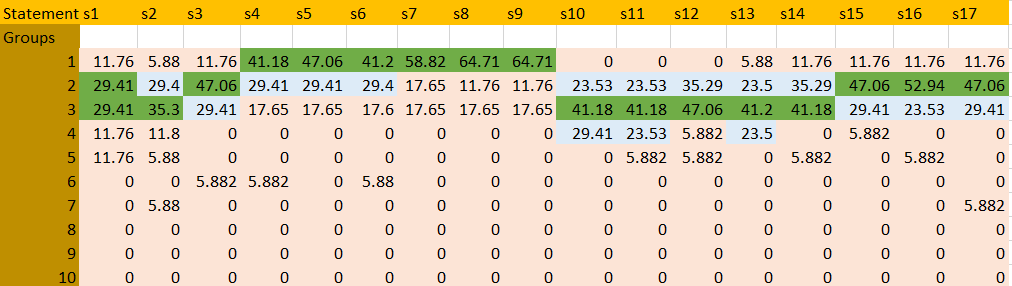

**The main groups identified are : Group 1 - 4.**

The classified sentences have been grouped as shown below :

 - **GROUP 1:** s8,s9,s7,s5,s6,s4


- **GROUP 2:** s16 ,s3, s15 , s17 ,s14,s12,s2, s4,s6,s10, s11, s13
 
- **GROUP 3:** s12, s10, s11 , s14 , s13 , s2 , s1 , s3 , s15, s17 , s16

- **GROUP 4:** s10 , s11 , s13




---


The categories identified were as follows :


---



- **Category A** (Common to Group 1&2) : s6 , s4

- **Category B** (Common to Group 2&3): s16 , s3 , s15 , s17,s14,s12 , s2, s10 , s11, s13

- **Category C** (Common to group 3&4): s10, s11 , s13 
- **Category D** (common to group 2&3): s15, s14, s17, s12



---


- In **70.595 %** of the participants, all the statements of Category A were grouped together.
 Which is :
   - Rate_how_fast_you_are_going
   - Rate_how_fast_you_are_moving



---


- In **71.7%** of the participants , all the statements of Category B were grouped together.
 Which is :
  - Rate_your_perception_of_self_motion
  - Rate_how_fast_you_think_you_are_moving
  - Rate_your_perceived_motion
  - Rate_your_perceived _movement
  - Rate_the_intensity_of_your_perception_of_self_motion
  -Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment
  - Rate_your_sensation_of_movement
  - Rate_how_intense_your_sensation_of_motion_is
  - Rate_how_strong_is_your_sensation_of_self_motion
  - Rate_your_perception_of_speed


---


- In **60.66 %**of the participants , all the statements of Category C were grouped together.
 Which is : 
 - Rate_how_intense_your_sensation_of_motion_is 
 - Rate_how_strong_is_your_sensation_of_self_motion
 - Rate_your_perception_of_speed
 
---


- In **76.47 %**of the participants , all the statements of Category D were grouped together.
 Which is : 
 - Rate_your_perceived_motion
 - Rate_your_perceived _movement
 - Rate_the_intensity_of_your_perception_of_self_motion
 - Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment
 
---



**From the percentage table** : 


---


We notice that S10 , S11 , S13 are commonly used in Group 2, 3,4 and it is noticed that in **92.14 %** of the participants , S10, S11 and S13 were grouped together , which is :  
- Rate_how_intense_your_sensation_of_motion_is 
- Rate_how_strong_is_your_sensation_of_self_motion  
- Rate_your_perception_of_speed

---


**Finding categories from participants who play video games more than 3 times a week :**


---





In [61]:
videogames_never = pd.DataFrame(surveyData)
games_never=videogames_never.loc[videogames_never["Play_video_games"] == "Never"]

In [62]:
games_never

Participant_No  ...                                            Group_5
7                8  ...                                                NaN
8                9  ...                                                NaN
10              11  ...                                                NaN
11              12  ...                                                NaN
16              17  ...                                              Speed
17              18  ...                  describes the feeling of movement
21              22  ...  Similar to Group 3 - rating what?  Your percep...
22              23  ...   perception of own movement, not limited to speed
24              25  ...                                                NaN
25              26  ...                                                NaN
27              28  ...                                                  -
28              29  ...                                                NaN
29              30  ...                                                NaN
31              32  ...  quality of the sensation of movement in more g...
32              33  ...                                 Similar ro group 3
34              35  ...  Same as 3 but more general to sensing movement...
36              37  ...                                                NaN
37              38  ...                                                NaN
38              39  ...                                                NaN
41              42  ...   perceived own motion (acknowledges subjectivity)

[20 rows x 28 columns]

**Correlations**

*Obtaining a correlation matrix for all the participants*

In [63]:
data = surveyData

In [64]:
columns_to_drop=['Participant_No']
data.drop(columns_to_drop, axis=1, inplace=True)

In [65]:
columns_to_drop=['Age', 'Gender', 'Level_of_English', 'Play_video_games', 'Use_VR_apps_with_whd']
data.drop(columns_to_drop, axis=1, inplace=True)

In [66]:
#columns_to_drop=['Rate_your_sensation_of_self_motion', 'Rate_your_sensation_of_movement', 'Rate_how_fast_you_think_you_are_moving', 'Rate_how_fast_you_are_moving', 'Rate_your_speed', 'Rate_how_fast_you_are_going', 'Rate_how_fast_the_train_is_moving', 'Rate_the_speed_of_the_train', 'Rate_the_velocity_of_the_train', 'Rate_how_intense_your_sensation_of_motion_is', 'Rate_how_strong_is_your_sensation_of_self_motion', 'Rate_the_intensity_of_your_perception_of_self_motion', 'Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment', 'Rate_your_perception_of_speed', 'Rate_your_perceived_motion', 'Rate_your_perception_of_self_motion', 'Rate_your_perceived _movement' ]
#test1.drop(columns_to_drop, axis=1, inplace=True)
columns_to_drop=['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5']
data.drop(columns_to_drop, axis=1, inplace=True)

In [67]:
data.head()

S1  S2  S3  S4  S5  S6  S7  S8  S9  S10  S11  S12  S13  S14  S15  S16  S17
0   4   4   2   3   3   3   1   1   1    4    4    2    4    5    2    2    2
1   3   3   2   1   1   1   1   1   1    3    3    2    3    2    2    2    2
2   2   2   3   1   1   1   1   1   1    2    2    3    2    3    3    3    3
3   5   5   2   2   2   2   2   2   2    3    3    3    3    4    1    1    1
4   2   2   1   1   1   1   1   1   1    3    3    3    3    2    2    2    2

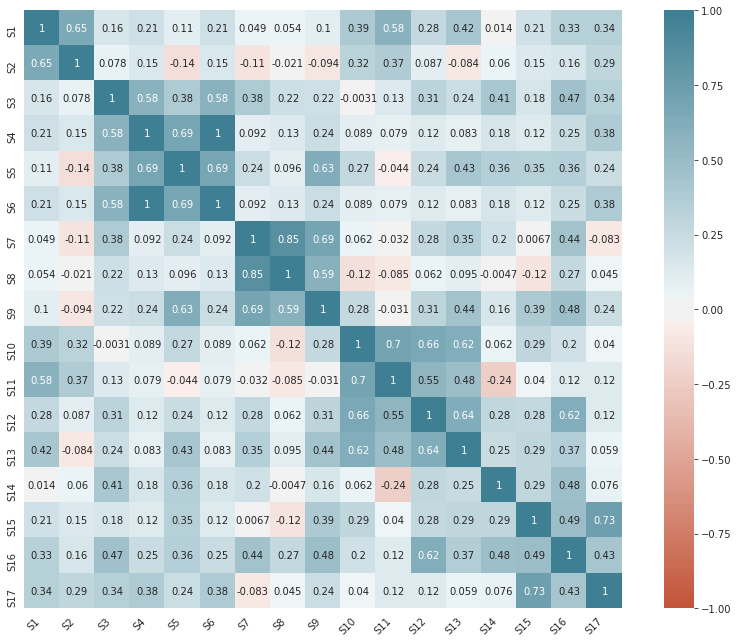

In [68]:
corr = data.corr()
#hmap=sns.heatmap(corr)
#hmap.figure.savefig("Correlation_Heatmap_with_Seaborn.png",
 #                   format='png',
  #                  dpi=100)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

 From the above plot ,based on the participants input, it can be inferred that : 
- S1 is highly correlated to s2, followed by s11,s13
and the least correlated to s14
- S2 is highly correlated to S1 , s11 and s12 
and the least correlated to S5
- S3 is highly correlated to S4 and S6 , s14 , s16
and the least correlated to s10.
- S4 is highly correlated to S6,S5 and S3
and the least correlated with s7
- S5 is highly correlated to S4 and S6, followed by s9 and S13
and the least correlated with s2
- S6 is highly correlated to S4, followed by S5 and S3
and the least correlated with s13
- S7 is highly correlated to S8, followed by s9
and the least correlated with s2
- S8 is highly correlated to S7, followed by S9
and the least correlated with s10 and s15
- S9 is highly correlated to S7,followed by S5 and S8
and the least correlated with s2
- S10 is highly correlated to S11, followed by S12 and S13
and the least correlated with s8
- S11 is highly correlated to S10, followed by S1 and S12
and the least correlated with s14
- S12 is highly correlated to S10, followed by S13 and S16
and the least correlated with s8
- S13 is highly correlated to S12, followed by S10 and S9
and the least correlated with s2
- S14 is highly correlated to S16,followed by S3 and S5
and the least correlated with s11
- S15 is highly correlated to S17, followed by S9 and S5
and the least correlated with s8
- S16 is highly correlated to S12,followed by S15,s14 and S9
and the least correlated with s11
- S17 is highly correlated to S15,followed by S16
and the least correlated with s7



Hence we can conclude that :


---
- **Rate_your_sensation_of_self_motion** is similar to **Rate_your_sensation_of_movement** and **Rate_how_strong_is_your_sensation_of_self_motion**. It is not similar to ***Rate_the_intensity_of_your_perception_of_self_motion***


---

- **Rate_your_sensation_of_movement** is similar to **Rate_your_sensation_of_self_motion**,**Rate_how_strong_is_your_sensation_of_self_motion** , **Rate_the_intensity_of_your_perception_of_self_motion** and least similar to **Rate_your_speed**.


---

- **Rate_how_fast_you_think_you_are_moving** is similar to **Rate_how_fast_you_are_moving** , **Rate_how_fast_you_are_going** and least similar to **Rate_how_intense_your_sensation_of_motion_is**


---
- **Rate_how_fast_you_are_moving** is similar to **Rate_how_fast_you_are_going** , **Rate_your_speed** and least similar to **Rate_how_fast_the_train_is_moving**.


---
- **Rate_your_speed is similar** to **Rate_how_fast_you_are_moving**, **Rate_how_fast_you_are_going** and the least similar to **Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment**


---
- **Rate_how_fast_you_are_going** is similar to **Rate_how_fast_you_are_moving** and least similar to **Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment**
---
- **Rate_how_fast_the_train_is_moving** is similar to **Rate_the_speed_of_the_train** and least similar to **Rate_your_sensation_of_movement**


---
- **Rate_the_speed_of_the_train** is similar to **Rate_how_fast_the_train_is_moving** and least similar to **Rate_how_intense_your_sensation_of_motion_is** and **Rate_your_perceived_motion**.


---
- **Rate_the_velocity_of_the_train** is similar to **Rate_how_fast_the_train_is_moving** and least similar to **Rate_your_sensation_of_movement**.


---
- **Rate_how_intense_your_sensation_of_motion_is** is similar to **Rate_how_strong_is_your_sensation_of_self_motion** and least similar to **Rate_the_speed_of_the_train**.


---
- **Rate_how_strong_is_your_sensation_of_self_motion** is similar to **Rate_how_intense_your_sensation_of_motion_is** and least similar to **Rate_your_perception_of_speed**.


---

- **Rate_the_intensity_of_your_perception_of_self_motion** is similar to **Rate_how_intense_your_sensation_of_motion_is** and least similar to **Rate_the_speed_of_the_train**


---

- **Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment** is similar to **Rate_the_intensity_of_your_perception_of_self_motion** and least similar to **Rate_your_sensation_of_movement**.


---

- **Rate_your_perception_of_speed** is similar to **Rate_your_perception_of_self_motion** and least similar to **Rate_how_strong_is_your_sensation_of_self_motion**


---

- **Rate_your_perceived_motion** is similar to **Rate_your_perceived _movement** and least similar to **Rate_the_speed_of_the_train**.


---

- **Rate_your_perception_of_self_motion** is similar to **Rate_the_intensity_of_your_perception_of_self_motion** and least similar to **Rate_how_strong_is_your_sensation_of_self_motion**


---


- **Rate_your_perceived _movement** is similar to **Rate_your_perceived_motion** and least similar to  **Rate_how_fast_the_train_is_moving**





*Obtaining a correlation matrix only for the english proficient users*

In [69]:
data_prof = prof
data_prof

Participant_No  ...                                            Group_5
0                1  ...  This group has to do with your understanding o...
1                2  ...                                                NaN
2                3  ...                                                NaN
3                4  ...  This is about what movement you're actually fe...
4                5  ...                                                NaN
7                8  ...                                                NaN
8                9  ...                                                NaN
10              11  ...                                                NaN
12              13  ...                         it is about your sensation
13              14  ...                                                NaN
14              15  ...                                                NaN
15              16  ...                                                NaN
16              17  ...                                              Speed
17              18  ...                  describes the feeling of movement
18              19  ...       Decision making about my perception of speed
19              20  ...                                                NaN
20              21  ...                                                NaN
21              22  ...  Similar to Group 3 - rating what?  Your percep...
22              23  ...   perception of own movement, not limited to speed
25              26  ...                                                NaN
26              27  ...  General sentences relating to how a person sen...
27              28  ...                                                  -
28              29  ...                                                NaN
30              31  ...                                                NaN
31              32  ...  quality of the sensation of movement in more g...
34              35  ...  Same as 3 but more general to sensing movement...
35              36  ...                                                NaN
36              37  ...                                                NaN
38              39  ...                                                NaN
40              41  ...                                                NaN
41              42  ...   perceived own motion (acknowledges subjectivity)
42              43  ...  you ask about self-motion here, which is a spe...
43              44  ...                                                NaN
44              45  ...                                                NaN
45              46  ...                                                NaN
46              47  ...                                                NaN
47              48  ...                                                NaN

[37 rows x 28 columns]

In [70]:
columns_to_drop=['Participant_No']
data_prof.drop(columns_to_drop, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
columns_to_drop=['Age', 'Gender', 'Level_of_English', 'Play_video_games', 'Use_VR_apps_with_whd']
data_prof.drop(columns_to_drop, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
#columns_to_drop=['Rate_your_sensation_of_self_motion', 'Rate_your_sensation_of_movement', 'Rate_how_fast_you_think_you_are_moving', 'Rate_how_fast_you_are_moving', 'Rate_your_speed', 'Rate_how_fast_you_are_going', 'Rate_how_fast_the_train_is_moving', 'Rate_the_speed_of_the_train', 'Rate_the_velocity_of_the_train', 'Rate_how_intense_your_sensation_of_motion_is', 'Rate_how_strong_is_your_sensation_of_self_motion', 'Rate_the_intensity_of_your_perception_of_self_motion', 'Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment', 'Rate_your_perception_of_speed', 'Rate_your_perceived_motion', 'Rate_your_perception_of_self_motion', 'Rate_your_perceived _movement' ]
#test1.drop(columns_to_drop, axis=1, inplace=True)
columns_to_drop=['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5']
data_prof.drop(columns_to_drop, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


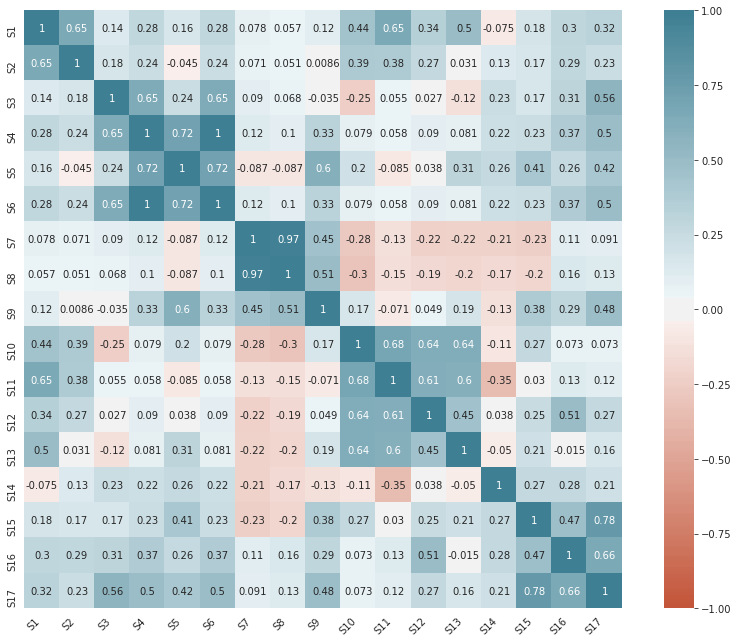

In [73]:
corr = data_prof.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

 From the above plot ,based on the participants input, it can be inferred that : 
- S1 is highly correlated to s2,
and the least correlated to s14
- S2 is highly correlated to S1 and the least correlated to S5
- S3 is highly correlated to S4 
and the least correlated to s10.
- S4 is highly correlated to S6,
and the least correlated with s11
- S5 is highly correlated to S4 and S6,
and the least correlated with s7 and s8
- S6 is highly correlated to S4
and the least correlated with s11
- S7 is highly correlated to S8
and the least correlated with s10
- S8 is highly correlated to S7,
and the least correlated with s10.
- S9 is highly correlated to S5 
and the least correlated with s14
- S10 is highly correlated to S11,
and the least correlated with s3
- S11 is highly correlated to S10
and the least correlated with s14
- S12 is highly correlated to S10,
and the least correlated with s7
- S13 is highly correlated to S10
and the least correlated with s7
- S14 is highly correlated to S16
and the least correlated with s11
- S15 is highly correlated to S17
and the least correlated with s7
- S16 is highly correlated to S17
and the least correlated with s13
- S17 is highly correlated to S15
and the least correlated with s10



Hence we can conclude that :


---
- **Rate_your_sensation_of_self_motion** is similar to **Rate_your_sensation_of_movement**.It is not similar to ***Rate_your_perception_of_speed***


---

- **Rate_your_sensation_of_movement** is similar to **Rate_your_sensation_of_self_motion** and least similar to **Rate_your_speed**.


---

- **Rate_how_fast_you_think_you_are_moving** is similar to **Rate_how_fast_you_are_moving**  and least similar to **Rate_how_intense_your_sensation_of_motion_is**


---
- **Rate_how_fast_you_are_moving** is similar to **Rate_how_fast_you_are_going** , **Rate_your_speed** and least similar to **Rate_how_fast_the_train_is_moving**.


---
- **Rate_your_speed is similar** to **Rate_how_fast_you_are_moving**, **Rate_how_fast_you_are_going** and the least similar to **Rate_how_fast_the_train_is_moving** and **Rate_the_speed_of_the_train**.


---
- **Rate_how_fast_you_are_going** is similar to **Rate_how_fast_you_are_moving** and least similar to **Rate_how_strong_is_your_sensation_of_self_motion**
---
- **Rate_how_fast_the_train_is_moving** is similar to **Rate_the_speed_of_the_train** and least similar to **Rate_how_intense_your_sensation_of_motion**


---
- **Rate_the_speed_of_the_train** is similar to **Rate_how_fast_the_train_is_moving** and least similar to **Rate_how_intense_your_sensation_of_motion_is**


---
- **Rate_the_velocity_of_the_train** is similar to **Rate_how_fast_the_train_is_moving** and least similar to **Rate_your_sensation_of_movement**.


---
- **Rate_how_intense_your_sensation_of_motion_is** is similar to **Rate_how_strong_your_sensation_of_motion_is** and least similar to **Rate_how_fast_you_think_you_are_moving**.


---
- **Rate_how_strong_is_your_sensation_of_self_motion** is similar to **Rate_how_intense_your_sensation_of_motion_is** and least similar to **Rate_your_perception_of_speed**.


---

- **Rate_the_intensity_of_your_perception_of_self_motion** is similar to **Rate_how_intense_your_sensation_of_motion_is** and least similar to **Rate_how_fast_the_train_is_moving**


---

- **Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment** is similar to **Rate_how_instense_your_sensation_of_motion_is** and least similar to **Rate_how_fast_the_train_is_moving**.


---

- **Rate_your_perception_of_speed** is similar to **Rate_your_perception_of_self_motion** and least similar to **Rate_how_strong_is_your_sensation_of_self_motion**


---

- **Rate_your_perceived_motion** is similar to **Rate_your_perceived _movement** and least similar to **Rate_how_fast_the_train_is_moving**.


---

- **Rate_your_perception_of_self_motion** is similar to **Rate_your_percieved_movement** and least similar to **Rate_the_intensity_of_your_sensation_of_self_motion_in_VR**


---


- **Rate_your_perceived _movement** is similar to **Rate_your_perceived_motion** and least similar to  **Rate_how_intense_your_sensation_of_motion_is**





Obtaining the heatmap for participants who only play games more than 3 times a week.

In [74]:
data_gamer = games
data_gamer

Participant_No  ...                                            Group_5
0                1  ...  This group has to do with your understanding o...
1                2  ...                                                NaN
2                3  ...                                                NaN
4                5  ...                                                NaN
5                6  ...                                                NaN
6                7  ...                                                NaN
9               10  ...                                                NaN
12              13  ...                         it is about your sensation
14              15  ...                                                NaN
15              16  ...                                                NaN
30              31  ...                                                NaN
42              43  ...  you ask about self-motion here, which is a spe...
43              44  ...                                                NaN
45              46  ...                                                NaN
46              47  ...                                                NaN
47              48  ...                                                NaN

[16 rows x 28 columns]

In [75]:
columns_to_drop=['Participant_No']
data_gamer.drop(columns_to_drop, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
columns_to_drop=['Age', 'Gender', 'Level_of_English', 'Play_video_games', 'Use_VR_apps_with_whd']
data_gamer.drop(columns_to_drop, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
#columns_to_drop=['Rate_your_sensation_of_self_motion', 'Rate_your_sensation_of_movement', 'Rate_how_fast_you_think_you_are_moving', 'Rate_how_fast_you_are_moving', 'Rate_your_speed', 'Rate_how_fast_you_are_going', 'Rate_how_fast_the_train_is_moving', 'Rate_the_speed_of_the_train', 'Rate_the_velocity_of_the_train', 'Rate_how_intense_your_sensation_of_motion_is', 'Rate_how_strong_is_your_sensation_of_self_motion', 'Rate_the_intensity_of_your_perception_of_self_motion', 'Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment', 'Rate_your_perception_of_speed', 'Rate_your_perceived_motion', 'Rate_your_perception_of_self_motion', 'Rate_your_perceived _movement' ]
#test1.drop(columns_to_drop, axis=1, inplace=True)
columns_to_drop=['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5']
data_gamer.drop(columns_to_drop, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


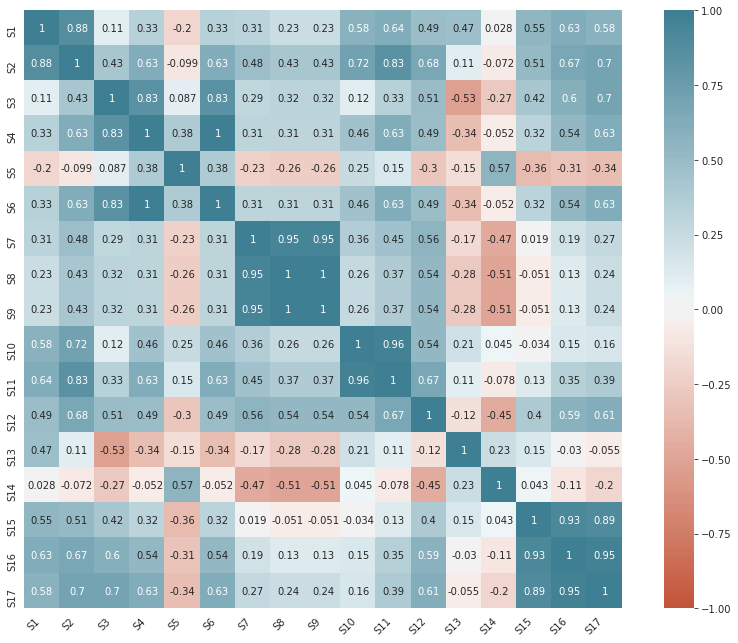

In [78]:
corr = data_gamer.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

 From the above plot ,based on the participants input, it can be inferred that : 
- S1 is highly correlated to s2,
and the least correlated to s5
- S2 is highly correlated to S1 and the least correlated to S5
- S3 is highly correlated to S4 
and the least correlated to s13.
- S4 is highly correlated to S6,
and the least correlated with s13
- S5 is highly correlated to S14,
and the least correlated with s15
- S6 is highly correlated to S4
and the least correlated with s13
- S7 is highly correlated to S8
and the least correlated with s14
- S8 is highly correlated to S9,
and the least correlated with s14.
- S9 is highly correlated to S8 
and the least correlated with s14
- S10 is highly correlated to S11,
and the least correlated with s15
- S11 is highly correlated to S10
and the least correlated with s14
- S12 is highly correlated to S2,
and the least correlated with s14
- S13 is highly correlated to S1
and the least correlated with s3
- S14 is highly correlated to S5
and the least correlated with s8
- S15 is highly correlated to S16
and the least correlated with s5
- S16 is highly correlated to S17
and the least correlated with s5
- S17 is highly correlated to S16
and the least correlated with s5



Hence we can conclude that :


---
- **Rate_your_sensation_of_self_motion** is similar to **Rate_your_sensation_of_movement**.It is not similar to ***Rate_your_speed***


---

- **Rate_your_sensation_of_movement** is similar to **Rate_your_sensation_of_motion** and least similar to **Rate_your_speed**.


---

- **Rate_how_fast_you_think_you_are_moving** is similar to **Rate_how_fast_you_are_moving**  and least similar to **Rate_the_intensity_of_your_sensation_in_VR**


---
- **Rate_how_fast_you_are_moving** is similar to **Rate_how_fast_you_are_going** and least similar to **Rate_the_intensity_of_your_sensation_in_VR**.


---
- **Rate_your_speed** is similar to **Rate_your_perception_of_speed**, and the least similar to **Rate_your_percieved_motion**.


---
- **Rate_how_fast_you_are_going** is similar to **Rate_how_fast_you_are_moving** and least similar to **Rate_the_intensity_of_your_sensation_in_VR**
---
- **Rate_how_fast_the_train_is_moving** is similar to **Rate_the_speed_of_the_train** and least similar to **Rate_your_perception_of_speed**


---
- **Rate_the_speed_of_the_train** is similar to **Rate_the_velocity_of_the_train** and least similar to **Rate_your_perception_of_speed**


---
- **Rate_the_velocity_of_the_train** is similar to **Rate_the_speed_of_the_train** and least similar to **Rate_your_perception_of_speed**.


---
- **Rate_how_intense_your_sensation_of_motion_is** is similar to **Rate_how_strong_is_your_sensation_of_self_motion** and least similar to **Rate_your_percieved_motion**.


---
- **Rate_how_strong_is_your_sensation_of_self_motion** is similar to **Rate_how_intense_your_sensation_of_motion_is** and least similar to **Rate_your_perception_of_speed**.


---

- **Rate_the_intensity_of_your_perception_of_self_motion** is similar to **Rate_your_sensation_of_movement** and least similar to **Rate_your_perception_of_speed**


---

- **Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment** is similar to **Rate_your_sensation_of_motion** and least similar to **Rate_how_fast_you_think_you_are_moving**.


---

- **Rate_your_perception_of_speed** is similar to **Rate_your_speed** and least similar to **Rate_the_speed_of_the_train**


---

- **Rate_your_perceived_motion** is similar to **Rate_your_perception_of_self_motion** and least similar to **Rate_your_speed**.


---

- **Rate_your_perception_of_self_motion** is similar to **Rate_your_percieved_movement** and least similar to **Rate_your_speed**


---


- **Rate_your_perceived _movement** is similar to **Rate_your_perception_of_self_motion** and least similar to  **Rate_your_speed**




In [79]:
data_never = games_never

In [80]:
columns_to_drop=['Participant_No']
data_never.drop(columns_to_drop, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [81]:
columns_to_drop=['Age', 'Gender', 'Level_of_English', 'Play_video_games', 'Use_VR_apps_with_whd']
data_never.drop(columns_to_drop, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [82]:
#columns_to_drop=['Rate_your_sensation_of_self_motion', 'Rate_your_sensation_of_movement', 'Rate_how_fast_you_think_you_are_moving', 'Rate_how_fast_you_are_moving', 'Rate_your_speed', 'Rate_how_fast_you_are_going', 'Rate_how_fast_the_train_is_moving', 'Rate_the_speed_of_the_train', 'Rate_the_velocity_of_the_train', 'Rate_how_intense_your_sensation_of_motion_is', 'Rate_how_strong_is_your_sensation_of_self_motion', 'Rate_the_intensity_of_your_perception_of_self_motion', 'Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment', 'Rate_your_perception_of_speed', 'Rate_your_perceived_motion', 'Rate_your_perception_of_self_motion', 'Rate_your_perceived _movement' ]
#test1.drop(columns_to_drop, axis=1, inplace=True)
columns_to_drop=['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5']
data_never.drop(columns_to_drop, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


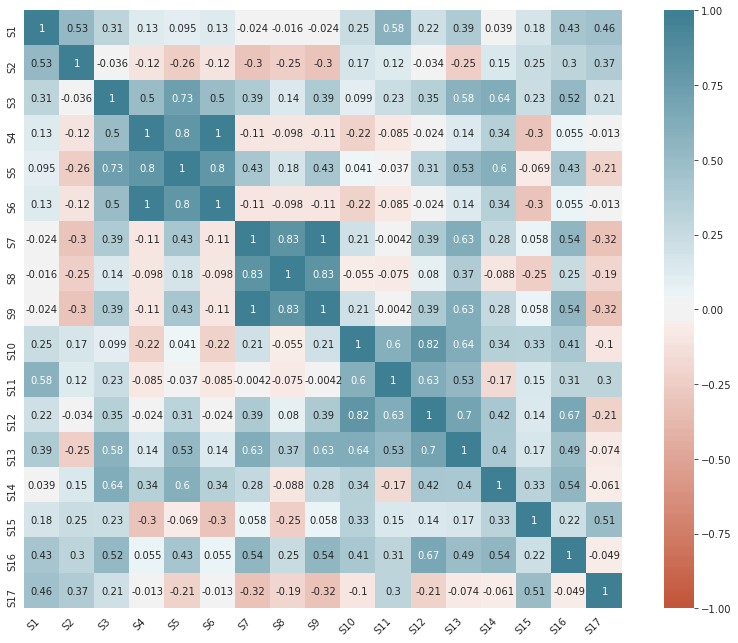

In [83]:
corr = data_never.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

 From the above plot ,based on the participants input, it can be inferred that : 
- S1 is highly correlated to s11,
and the least correlated to s14
- S2 is highly correlated to S1 and the least correlated to S7
- S3 is highly correlated to S5 
and the least correlated to s2.
- S4 is highly correlated to S6,
and the least correlated with s15
- S5 is highly correlated to S4,
and the least correlated with s2
- S6 is highly correlated to S4
and the least correlated with s15
- S7 is highly correlated to S8
and the least correlated with s14
- S8 is highly correlated to S9,
and the least correlated with s14.
- S9 is highly correlated to S9 
and the least correlated with s17
- S10 is highly correlated to S12,
and the least correlated with s4
- S11 is highly correlated to S12
and the least correlated with s14
- S12 is highly correlated to S10,
and the least correlated with s17
- S13 is highly correlated to S12
and the least correlated with s2
- S14 is highly correlated to S3
and the least correlated with s11
- S15 is highly correlated to S17
and the least correlated with s4
- S16 is highly correlated to S12
and the least correlated with s17
- S17 is highly correlated to S15
and the least correlated with s7



Hence we can conclude that :


---
- **Rate_your_sensation_of_self_motion** is similar to **Rate_how_strong_is_your_sensation_of_self_motion**.It is not similar to ***Rate_your_perception_of_speed***


---

- **Rate_your_sensation_of_movement** is similar to **Rate_your_sensation_of_motion** and least similar to **Rate_how_fast_the_train_is_moving**.


---

- **Rate_how_fast_you_think_you_are_moving** is similar to **Rate_your_speed**  and least similar to **Rate_your_sensation_of_movement**


---
- **Rate_how_fast_you_are_moving** is similar to **Rate_how_fast_you_are_going** and least similar to **Rate_your_percieved_motion**.


---
- **Rate_your_speed** is similar to **Rate_how_fast_you_are_moving**, and the least similar to **Rate_your_sensation_of_movement**.


---
- **Rate_how_fast_you_are_going** is similar to **Rate_how_fast_you_are_moving** and least similar to **Rate_your_percieved_motion**
---
- **Rate_how_fast_the_train_is_moving** is similar to **Rate_the_speed_of_the_train** and least similar to **Rate_your_perception_of_speed**


---
- **Rate_the_speed_of_the_train** is similar to **Rate_the_velocity_of_the_train** and least similar to **Rate_your_perception_of_speed**


---
- **Rate_the_velocity_of_the_train** is similar to **Rate_the_speed_of_the_train** and least similar to **Rate_your_percieved_movement**.


---
- **Rate_how_intense_your_sensation_of_motion_is** is similar to **Rate_how_strong_is_your_sensation_of_self_motion** and least similar to **Rate_how_fast_you_are_moving**.


---
- **Rate_how_strong_is_your_sensation_of_self_motion** is similar to **Rate_the_intensity_of_your_perception_of_self_motion** and least similar to **Rate_your_perception_of_speed**.


---

- **Rate_the_intensity_of_your_perception_of_self_motion** is similar to **Rate_how_intense_your_sensation_of_motion_is** and least similar to **Rate_your_percieved_movement**


---

- **Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment** is similar to **Rate_how_intense_your_sensation_of_motion_is** and least similar to **Rate_your_sensation_of_movement**.


---

- **Rate_your_perception_of_speed** is similar to **Rate_how_fast_you_think_you_are_moving** and least similar to **Rate_how_strong_is_your_sensation_of_self_motion**


---

- **Rate_your_perceived_motion** is similar to **Rate_your_perceived _movement** and least similar to **Rate_how_fast_you_are_moving**.


---

- **Rate_your_perception_of_self_motion** is similar to **Rate_the_intensity_of_your_perception_of_self_motion** and least similar to **Rate_your_perceived _movement**


---


- **Rate_your_perceived _movement** is similar to **Rate_your_perceived_motion** and least similar to  **Rate_how_fast_the_train_is_moving**




In [110]:

ColumnOfGroup1 = surveyData.Group_1
ColumnOfGroup2 = surveyData.Group_2
ColumnOfGroup3 = surveyData.Group_3
ColumnOfGroup4 = surveyData.Group_4
ColumnOfGroup5 = surveyData.Group_5

# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Checking for pairwise similarity
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix1 = count_vectorizer.fit_transform(ColumnOfGroup1)
sparse_matrix2 = count_vectorizer.fit_transform(ColumnOfGroup2)
sparse_matrix3 = count_vectorizer.fit_transform(ColumnOfGroup3)
sparse_matrix4 = count_vectorizer.fit_transform(ColumnOfGroup4)
sparse_matrix5 = count_vectorizer.fit_transform(ColumnOfGroup5)

matrix1 = cosine_similarity(sparse_matrix1[0:1], sparse_matrix1)
matrix2 = cosine_similarity(sparse_matrix2[0:1], sparse_matrix2)
matrix3 = cosine_similarity(sparse_matrix3[0:1], sparse_matrix3)
matrix4 = cosine_similarity(sparse_matrix4[0:1], sparse_matrix4)
matrix5 = cosine_similarity(sparse_matrix5[0:1], sparse_matrix5)

In [111]:
matrix1

array([[1.        , 0.31448545, 0.09805807, 0.1754116 , 0.38096966,
        0.0836242 , 0.2941742 , 0.09805807, 0.48891771, 0.70891756,
        0.13867505, 0.52414242, 0.        , 0.        , 0.30769231,
        0.        , 0.13867505, 0.10482848, 0.0877058 , 0.43852901,
        0.16012815, 0.87705802, 0.20965697, 0.45291081, 0.34698896,
        0.12403473, 0.50128041, 0.73379939, 0.12403473, 0.24019223,
        0.43852901, 0.66899361, 0.36980013, 0.36980013, 0.41931393,
        0.22237479, 0.        , 0.        , 0.41344912, 0.19611614,
        0.04331481, 0.33968311, 0.24019223, 0.35805744, 0.68640647,
        0.3721042 , 0.36313652, 0.50174521]])

In [112]:
matrix2

array([[1.        , 0.10482848, 0.09245003, 0.14322297, 0.19611614,
        0.0877058 , 0.12403473, 0.23076923, 0.15724273, 0.44474959,
        0.13867505, 0.        , 0.31448545, 0.        , 0.52297636,
        0.        , 0.07412493, 0.10482848, 0.09245003, 0.        ,
        0.        , 0.18490007, 0.12403473, 0.09805807, 0.0836242 ,
        0.13453456, 0.1672484 , 0.13867505, 0.0836242 , 0.        ,
        0.07692308, 0.        , 0.1672484 , 0.3363364 , 0.5728919 ,
        0.0836242 , 0.        , 0.        , 0.1902606 , 0.        ,
        0.06933752, 0.        , 0.1672484 , 0.15724273, 0.20965697,
        0.04902903, 0.10482848, 0.        ]])

In [113]:
matrix3

array([[1.        , 0.16666667, 0.0949158 , 0.30618622, 0.21004201,
        0.10206207, 0.09128709, 0.08333333, 0.070014  , 0.21004201,
        0.        , 0.08885233, 0.11785113, 0.        , 0.12909944,
        0.20412415, 0.        , 0.12909944, 0.12909944, 0.19245009,
        0.        , 0.        , 0.25819889, 0.25819889, 0.0745356 ,
        0.15811388, 0.11785113, 0.25819889, 0.18257419, 0.08006408,
        0.15309311, 0.        , 0.26111648, 0.08703883, 0.12909944,
        0.        , 0.        , 0.26111648, 0.30123204, 0.        ,
        0.14784425, 0.10910895, 0.        , 0.09128709, 0.        ,
        0.12309149, 0.        , 0.        ]])

In [114]:
matrix4

array([[1.        , 0.09622504, 0.08333333, 0.08006408, 0.05892557,
        0.        , 0.16666667, 0.        , 0.16012815, 0.        ,
        0.17407766, 0.        , 0.        , 0.08333333, 0.27386128,
        0.20412415, 0.        , 0.09622504, 0.09901475, 0.21821789,
        0.1132277 , 0.11785113, 0.41182635, 0.10910895, 0.28867513,
        0.09128709, 0.        ]])

In [115]:
matrix5

array([[1.        , 0.2236068 , 0.2       , 0.        , 0.2       ,
        0.16903085, 0.42426407, 0.23717082, 0.15811388, 0.        ,
        0.27975144, 0.12909944, 0.21213203, 0.1       , 0.3       ]])

**Group 1**

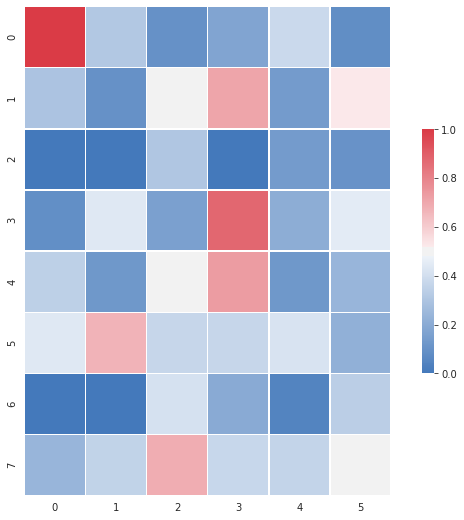

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# A list with your data slightly edited

group_1 = [1.        , 0.31448545, 0.09805807, 0.1754116 , 0.38096966,
        0.0836242 , 0.2941742 , 0.09805807, 0.48891771, 0.70891756,
        0.13867505, 0.52414242, 0.        , 0.        , 0.30769231,
        0.        , 0.13867505, 0.10482848, 0.0877058 , 0.43852901,
        0.16012815, 0.87705802, 0.20965697, 0.45291081, 0.34698896,
        0.12403473, 0.50128041, 0.73379939, 0.12403473, 0.24019223,
        0.43852901, 0.66899361, 0.36980013, 0.36980013, 0.41931393,
        0.22237479, 0.        , 0.        , 0.41344912, 0.19611614,
        0.04331481, 0.33968311, 0.24019223, 0.35805744, 0.68640647,
        0.3721042 , 0.36313652, 0.50174521]

# Split list
n = 6
data = [group_1[i:i + n] for i in range(0, len(group_1), n)]

df = pd.DataFrame(data)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = False)

**Group 2**

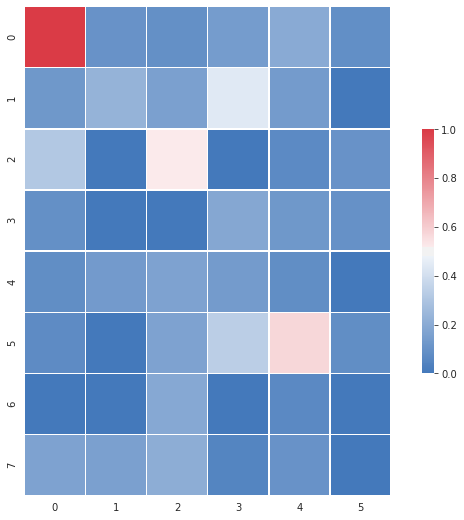

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# A list with your data slightly edited

group_1 = [1.        , 0.10482848, 0.09245003, 0.14322297, 0.19611614,
        0.0877058 , 0.12403473, 0.23076923, 0.15724273, 0.44474959,
        0.13867505, 0.        , 0.31448545, 0.        , 0.52297636,
        0.        , 0.07412493, 0.10482848, 0.09245003, 0.        ,
        0.        , 0.18490007, 0.12403473, 0.09805807, 0.0836242 ,
        0.13453456, 0.1672484 , 0.13867505, 0.0836242 , 0.        ,
        0.07692308, 0.        , 0.1672484 , 0.3363364 , 0.5728919 ,
        0.0836242 , 0.        , 0.        , 0.1902606 , 0.        ,
        0.06933752, 0.        , 0.1672484 , 0.15724273, 0.20965697,
        0.04902903, 0.10482848, 0.       ]

# Split list
n = 6
data = [group_1[i:i + n] for i in range(0, len(group_1), n)]

df = pd.DataFrame(data)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = False)

**Group 3**

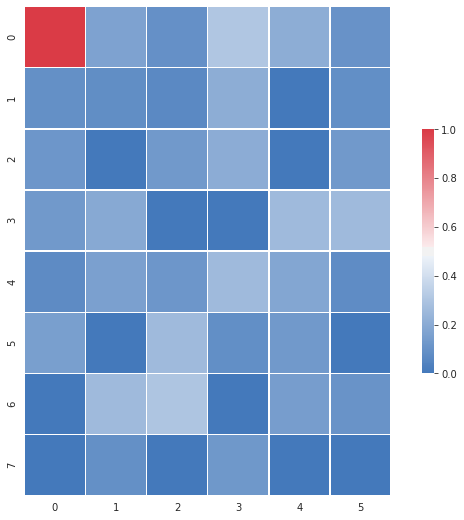

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# A list with your data slightly edited

group_1 = [1.        , 0.16666667, 0.0949158 , 0.30618622, 0.21004201,
        0.10206207, 0.09128709, 0.08333333, 0.070014  , 0.21004201,
        0.        , 0.08885233, 0.11785113, 0.        , 0.12909944,
        0.20412415, 0.        , 0.12909944, 0.12909944, 0.19245009,
        0.        , 0.        , 0.25819889, 0.25819889, 0.0745356 ,
        0.15811388, 0.11785113, 0.25819889, 0.18257419, 0.08006408,
        0.15309311, 0.        , 0.26111648, 0.08703883, 0.12909944,
        0.        , 0.        , 0.26111648, 0.30123204, 0.        ,
        0.14784425, 0.10910895, 0.        , 0.09128709, 0.        ,
        0.12309149, 0.        , 0.           ]

# Split list
n = 6
data = [group_1[i:i + n] for i in range(0, len(group_1), n)]

df = pd.DataFrame(data)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = False)

**Group 4**

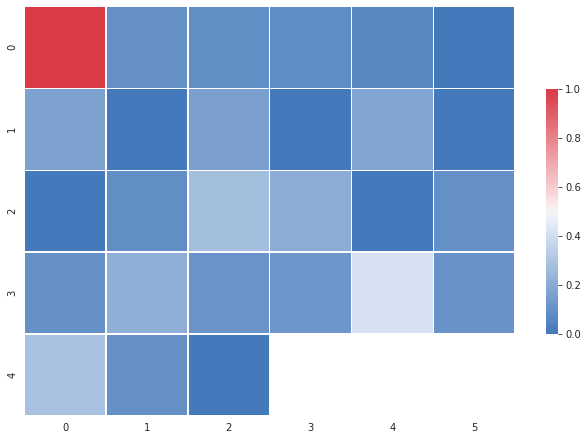

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# A list with your data slightly edited

group_1 = [1.        , 0.09622504, 0.08333333, 0.08006408, 0.05892557,
        0.        , 0.16666667, 0.        , 0.16012815, 0.        ,
        0.17407766, 0.        , 0.        , 0.08333333, 0.27386128,
        0.20412415, 0.        , 0.09622504, 0.09901475, 0.21821789,
        0.1132277 , 0.11785113, 0.41182635, 0.10910895, 0.28867513,
        0.09128709, 0.         ]

# Split list
n = 6
data = [group_1[i:i + n] for i in range(0, len(group_1), n)]

df = pd.DataFrame(data)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = False)

**Group 5**

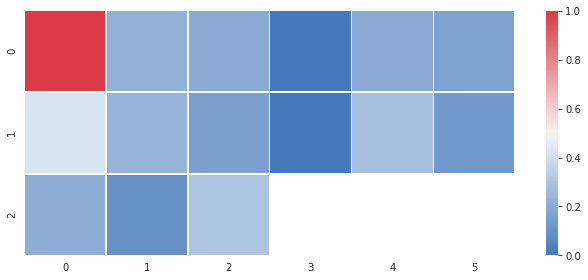

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# A list with your data slightly edited

group_1 = [1.        , 0.2236068 , 0.2       , 0.        , 0.2       ,
        0.16903085, 0.42426407, 0.23717082, 0.15811388, 0.        ,
        0.27975144, 0.12909944, 0.21213203, 0.1       , 0.3       ]

# Split list
n = 6
data = [group_1[i:i + n] for i in range(0, len(group_1), n)]

df = pd.DataFrame(data)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = False)

# Data Visualization

*The Y -axis of the bar graph represents the group numbers of the user's classification for each of the statements*. For each of the statements we calculate what percent of the users have used which group and on what basis have they selected it.

**S : Rate your sensation of self motion**

**S : Rate_your_sensation_of_movement**



**Word cloud data visulization**

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points is being highlighted using a word cloud.

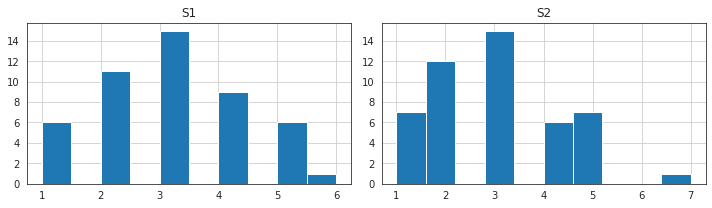

In [150]:
columns_to_plot = ['S1', 'S2']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
    ax = fig.add_subplot(3,2,i+1)
    surveyData[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show()

As per the analysis it it noticed that for the question related to **" Rating the sensation of self motion "** 
- **31%** of the users selected **Group 3** 
- **22 %** of the users selected **Group 2**
- **19 %** of the users selected **Group 4** 

For the question related **' Rate_your_sensation_of_movement '**
- **31%** of the users selected **Group 3**
- **25%** of the users selected **Group 2**
- **14%** of the users selected **Group 5**

**S : Rate_how_fast_you_think_you_are_moving**

**S : Rate_how_fast_you_are_moving**

**S : Rate_your_speed , Rate_how_fast_you_are_going**    

**S : Rate_how_fast_the_train_is_moving**

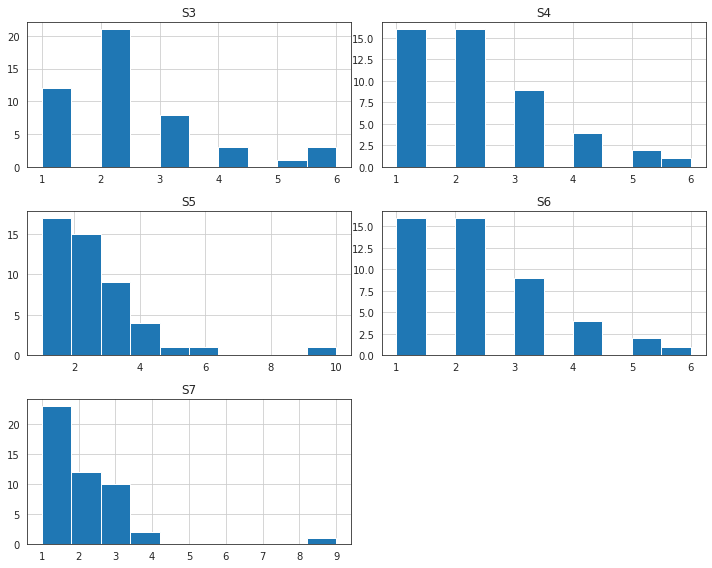

In [151]:
columns_to_plot = ['S3', 'S4', 
                   'S5', 'S6', 'S7']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
  ax = fig.add_subplot(3,2,i+1)
  surveyData[column].hist(bins=10,ax=ax)
  ax.set_title(column)
fig.tight_layout()
plt.show()                   

For the question **Rate_how_fast_you_think_you_are_moving**: 
- **44%** of the users classified under **Group 2**
- **25%** of the users classified under **Group 1**
- **17%** of the users classified under **Group 3**

For the question **Rate_how_fast_you_are_moving**:
- **33%** of the users choose **Group 2** and **Group 1**
- **19%** of the users choose **Group 3** 

For the question **Rate_your_speed** : 
- **35%** of the users selected **Group 1**
- **31%** of the users  selected **Group 2**

For the question **Rate_how_fast_you_are_going** : 
- **33%** of the users choose **Group 2** and **Group 1** 

For the question **Rate_how_fast_the_train_is_moving** : 
- **48%** of the users selected **Group 1**
- **25%** of the users selected **Group 2**

**S : Rate_the_speed_of_the_train**

**S : Rate_the_velocity_of_the_train**

**S : Rate_how_intense_your_sensation_of_motion_is**

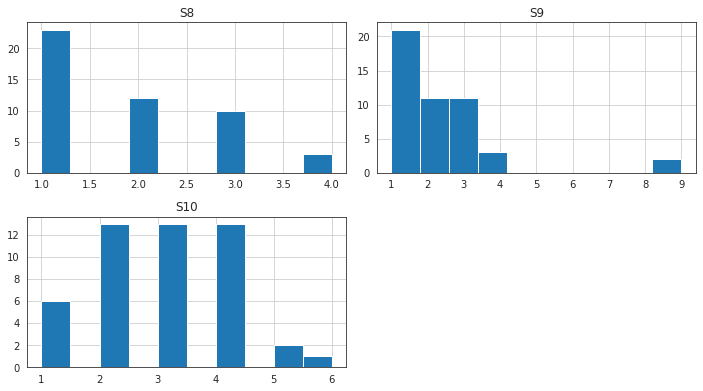

In [152]:
columns_to_plot = ['S8', 'S9', 'S10']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
#    ax = fig.add_subplot(3,3,i+1)
    ax = fig.add_subplot(3,2,i+1)

    surveyData[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show()  

For the Question **Rate_the_speed_of_the_train** : 
- **47%** of the users selected **Group 1**
- **25%** of the users selected **Group 2**

For the question **Rate_the_velocity_of_the_train** : 
- **44%** of the users selected **Group 1**
- **22% **of the users selected **Group 3** and **Group 2**

For the question **Rate_how_intense_your_sensation_of_motion_is** :
- **27%** of the users have selected **Group 4** , **Group 3**  and **Group 2**

**S : Rate_how_strong_is_your_sensation_of_self_motion**

**S : Rate_the_intensity_of_your_perception_of_self_motion**

**S :     Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment**

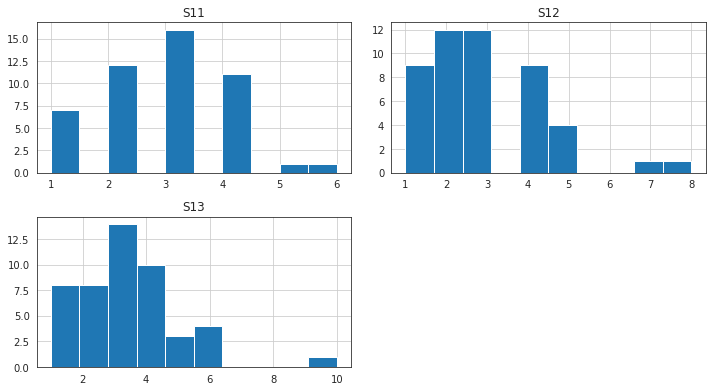

In [153]:
columns_to_plot = ['S11', 'S12', 'S13']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
#    ax = fig.add_subplot(3,3,i+1)
    ax = fig.add_subplot(3,2,i+1)

    surveyData[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show() 

For the question **Rate_how_strong_is_your_sensation_of_self_motion** : 
- **33%** of the users selected **Group 3**
- **25%** of the users selected **Group 2**

For the question **Rate_the_intensity_of_your_perception_of_self_motion** : 
- **25%** of the users selected **Group 3** and **Group 2**

For the question
      **Rate_the_intensity_of_your_sensation_of_self_motion_in_the_virtual_environment**: 
- **29%** of the users selected **Group 3**
- **20%** of the users selected **Group 4**

**S : Rate_your_perception_of_speed**

**S : Rate_your_perceived_motion**

**S : Rate_your_perception_of_self_motion**

**S : Rate_your_perceived _movement**

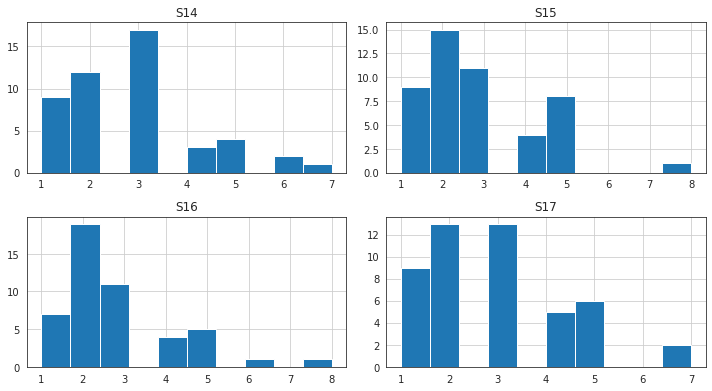

In [154]:
columns_to_plot = ['S14', 'S15', 
                   'S16', 'S17']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
#    ax = fig.add_subplot(3,3,i+1)
    ax = fig.add_subplot(3,2,i+1)

    surveyData[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show() 

For the Question **Rate_your_perception_of_speed**: 
- **35%** of the users selected **Group 3**
- **25%** of the users selected **Group 2**

For the question **Rate_your_perceived_motion**:
- **31%** of the users selected **Group 2**
- **22%** of the users selected **Group 3**

For the question **Rate_your_perception_of_self_motion** :
- **40%** of the users selected **Group 2**
- **22%** of the users selected **Group 3**

For the question **Rate_your_perceived _movement**: 
- **27%** of the users have selected **Group 3** and **Group 2**

**WORDCLOUDS**

**WORD CLOUD OF USER'S JUSTIFICATION FOR  GROUP_1**

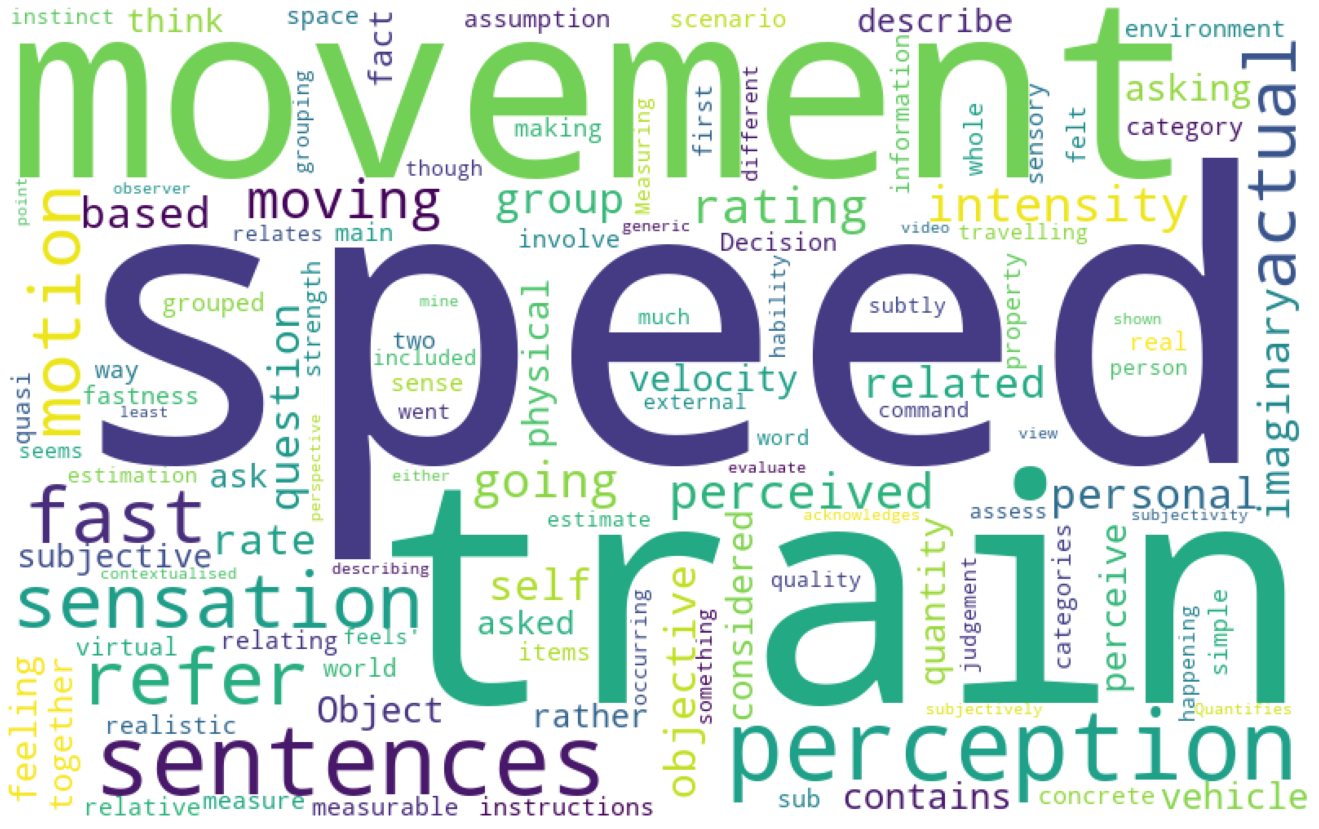

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(surveyData.Group_1))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the above wordcloud plot the most frequently used words by the user is highlighted bigger as shown in the above figure , which are : **Train** , **Speed** ,**movement**.

In [ ]:
wordfreq = wordcloud.words_
wordfreq

{'Decision': 0.047619047619047616,
 'Measuring': 0.047619047619047616,
 'Object': 0.09523809523809523,
 'Quantifies': 0.047619047619047616,
 'acknowledges': 0.047619047619047616,
 'actual': 0.23809523809523808,
 'ask': 0.09523809523809523,
 'asked': 0.09523809523809523,
 'asking': 0.09523809523809523,
 'assess': 0.047619047619047616,
 'assumption': 0.047619047619047616,
 'based': 0.14285714285714285,
 'categories': 0.047619047619047616,
 'category': 0.047619047619047616,
 'command': 0.047619047619047616,
 'concrete': 0.047619047619047616,
 'considered': 0.09523809523809523,
 'contains': 0.09523809523809523,
 'contextualised': 0.047619047619047616,
 'describe': 0.09523809523809523,
 'describing': 0.047619047619047616,
 'different': 0.047619047619047616,
 'either': 0.047619047619047616,
 'environment': 0.047619047619047616,
 'estimate': 0.047619047619047616,
 'estimation': 0.047619047619047616,
 'evaluate': 0.047619047619047616,
 'external': 0.047619047619047616,
 'fact': 0.0952380952380

The frequency count of the words are in the range of 0 -1. Higher the value , higher is the frequency of occurance of words :

- Train = **0.7619047619047619**
- Speed = **1.0**
- Movement = **0.47619047619047616**

**WORD CLOUD OF USER'S JUSTIFICATION OF GROUP_2**

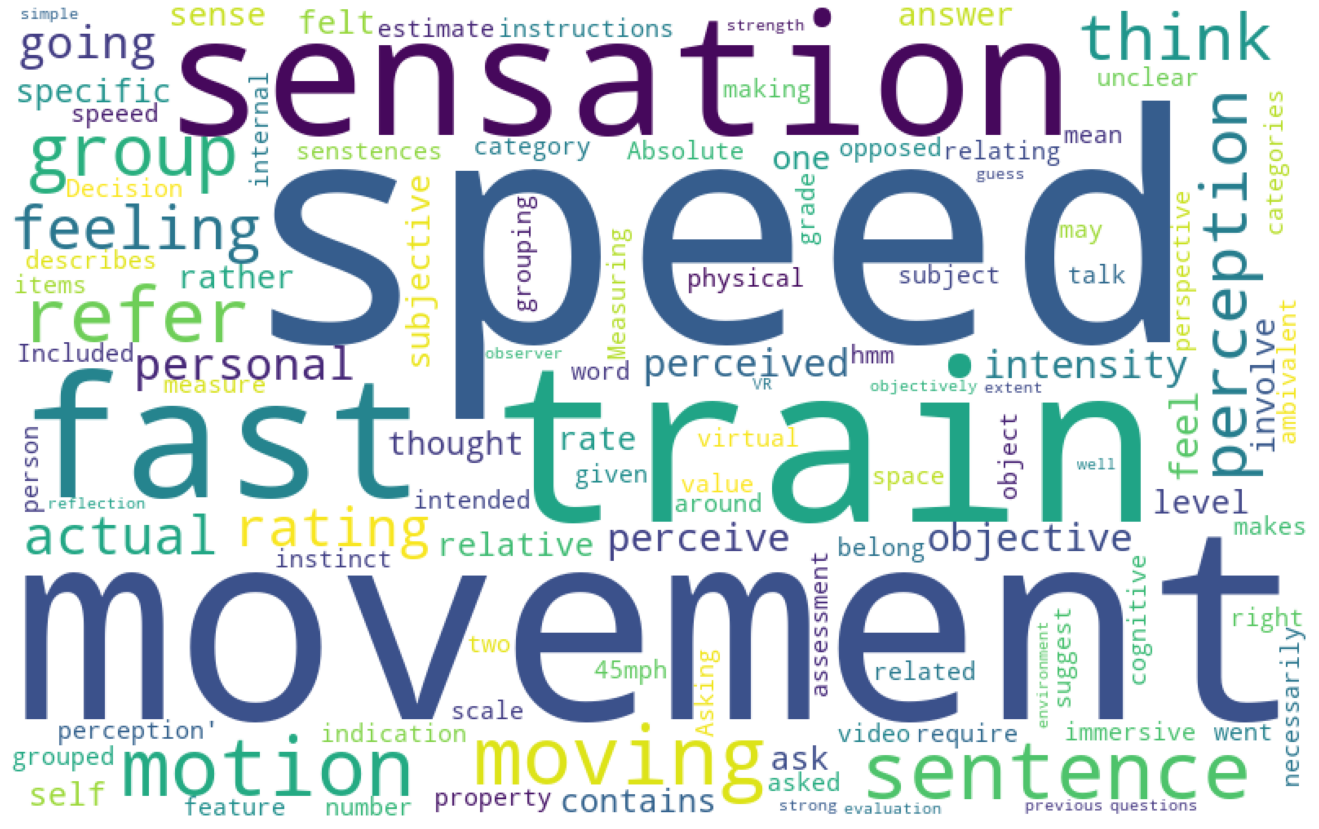

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(surveyData.Group_2))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the above wordcloud plot the most frequently used words by the user is highlighted bigger as shown above , which are : **Speed** , **Train** ,**movement** , **sensation**.

In [ ]:
wordfreq = wordcloud.words_
wordfreq

{'45mph': 0.06666666666666667,
 'Absolute': 0.06666666666666667,
 'Asking': 0.06666666666666667,
 'Decision': 0.06666666666666667,
 'Included': 0.06666666666666667,
 'Measuring': 0.06666666666666667,
 'VR': 0.06666666666666667,
 'actual': 0.26666666666666666,
 'ambivalent': 0.06666666666666667,
 'answer': 0.13333333333333333,
 'around': 0.06666666666666667,
 'ask': 0.13333333333333333,
 'asked': 0.06666666666666667,
 'assessment': 0.06666666666666667,
 'belong': 0.06666666666666667,
 'categories': 0.06666666666666667,
 'category': 0.06666666666666667,
 'cognitive': 0.06666666666666667,
 'contains': 0.13333333333333333,
 'describes': 0.06666666666666667,
 'environment': 0.06666666666666667,
 'estimate': 0.06666666666666667,
 'evaluation': 0.06666666666666667,
 'extent': 0.06666666666666667,
 'fast': 0.5333333333333333,
 'feature': 0.06666666666666667,
 'feel': 0.2,
 'feeling': 0.3333333333333333,
 'felt': 0.13333333333333333,
 'given': 0.06666666666666667,
 'going': 0.26666666666666666,

The frequency count of the words are :

- Speed = **1.0**
- Movement = **0.9333333333333333**
- Train = **0.6**
- Sensation = **0.5333333333333333**

**WORD CLOUD OF USER'S JUSTIFICATION IN SELECTING FOR GROUP_3**

From the above wordcloud plot the most frequently used words by the user is highlighted bigger as shown above , which are : **Train** , **Speed** ,**Perception** , **movement**.

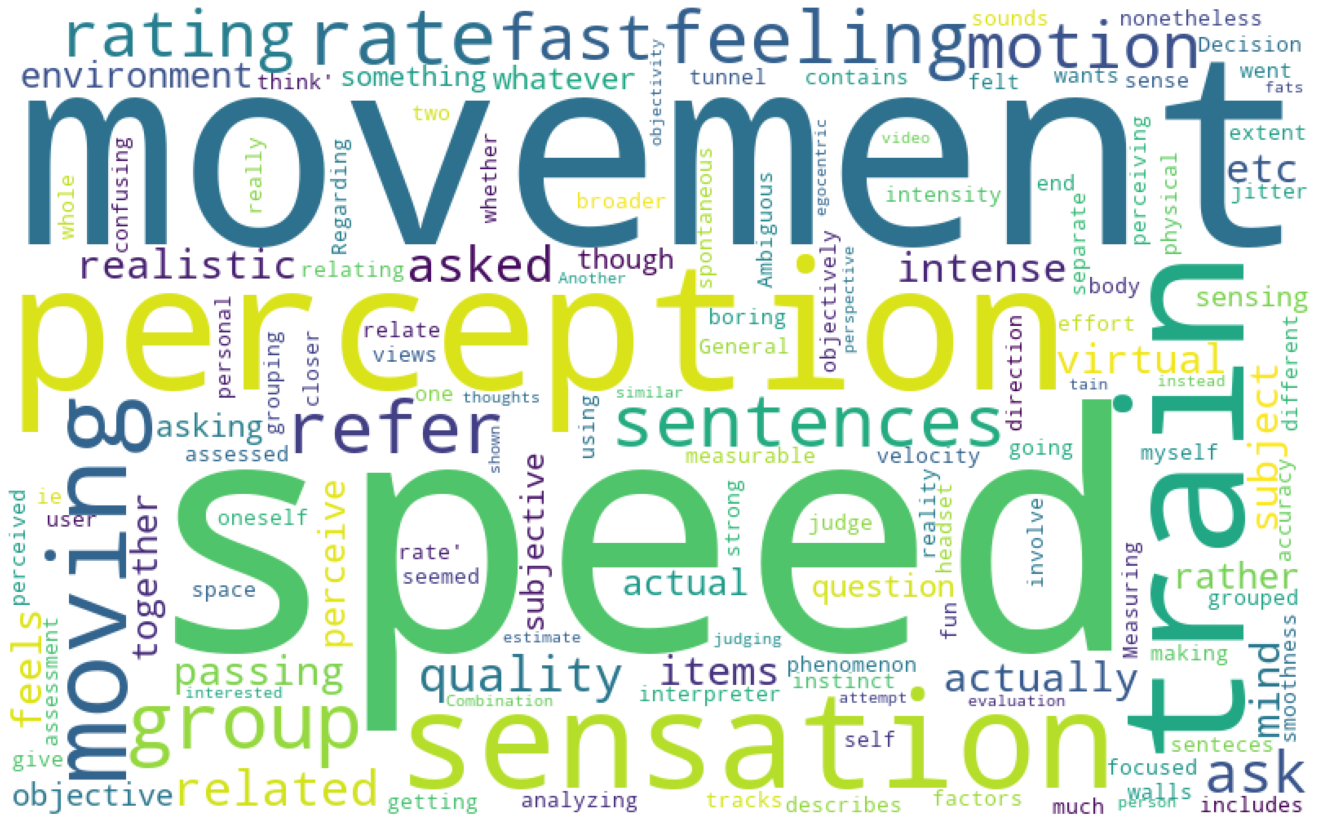

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(surveyData.Group_3))
wordfreq = wordcloud.words_
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#WordCloud().process_text('speed movement sensation perception train moving')
wordfreq = wordcloud.words_
wordfreq

{'Ambiguous': 0.06666666666666667,
 'Another': 0.06666666666666667,
 'Combination': 0.06666666666666667,
 'Decision': 0.06666666666666667,
 'General': 0.06666666666666667,
 'Measuring': 0.06666666666666667,
 'Regarding': 0.06666666666666667,
 'accuracy': 0.06666666666666667,
 'actual': 0.13333333333333333,
 'actually': 0.13333333333333333,
 'analyzing': 0.06666666666666667,
 'ask': 0.2,
 'asked': 0.2,
 'asking': 0.13333333333333333,
 'assessed': 0.06666666666666667,
 'assessment': 0.06666666666666667,
 'attempt': 0.06666666666666667,
 'body': 0.06666666666666667,
 'boring': 0.06666666666666667,
 'broader': 0.06666666666666667,
 'closer': 0.06666666666666667,
 'confusing': 0.06666666666666667,
 'contains': 0.06666666666666667,
 'describes': 0.06666666666666667,
 'different': 0.06666666666666667,
 'direction': 0.06666666666666667,
 'effort': 0.06666666666666667,
 'egocentric': 0.06666666666666667,
 'end': 0.06666666666666667,
 'environment': 0.13333333333333333,
 'estimate': 0.0666666666

The frequency of it is obtained from below , where :

- Speed = **1.0**
- Movement = **0.9333333333333333**
- Perception = **0.8666666666666667**
- Train=**0.8**

**Group 4**

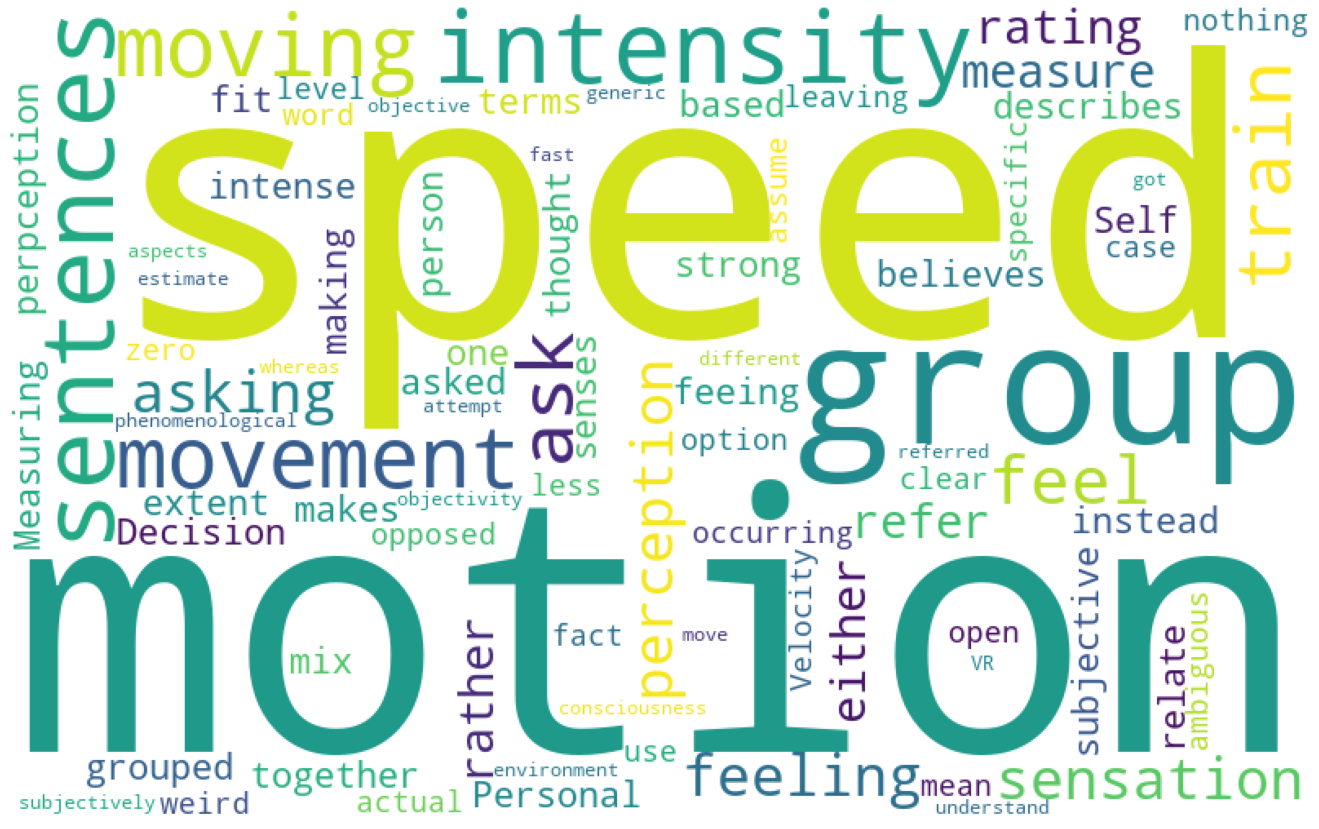

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(surveyData.Group_4))
wordfreq = wordcloud.words_
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
wordfreq = wordcloud.words_
wordfreq

{'Decision': 0.1111111111111111,
 'Measuring': 0.1111111111111111,
 'Personal': 0.1111111111111111,
 'Self': 0.1111111111111111,
 'VR': 0.1111111111111111,
 'Velocity': 0.1111111111111111,
 'actual': 0.1111111111111111,
 'ambiguous': 0.1111111111111111,
 'ask': 0.4444444444444444,
 'asked': 0.1111111111111111,
 'asking': 0.3333333333333333,
 'aspects': 0.1111111111111111,
 'assume': 0.1111111111111111,
 'attempt': 0.1111111111111111,
 'based': 0.1111111111111111,
 'believes': 0.1111111111111111,
 'case': 0.1111111111111111,
 'clear': 0.1111111111111111,
 'consciousness': 0.1111111111111111,
 'describes': 0.1111111111111111,
 'different': 0.1111111111111111,
 'either': 0.2222222222222222,
 'environment': 0.1111111111111111,
 'estimate': 0.1111111111111111,
 'extent': 0.1111111111111111,
 'fact': 0.1111111111111111,
 'fast': 0.1111111111111111,
 'feeing': 0.1111111111111111,
 'feel': 0.3333333333333333,
 'feeling': 0.3333333333333333,
 'fit': 0.1111111111111111,
 'generic': 0.11111111111

**Group 5**

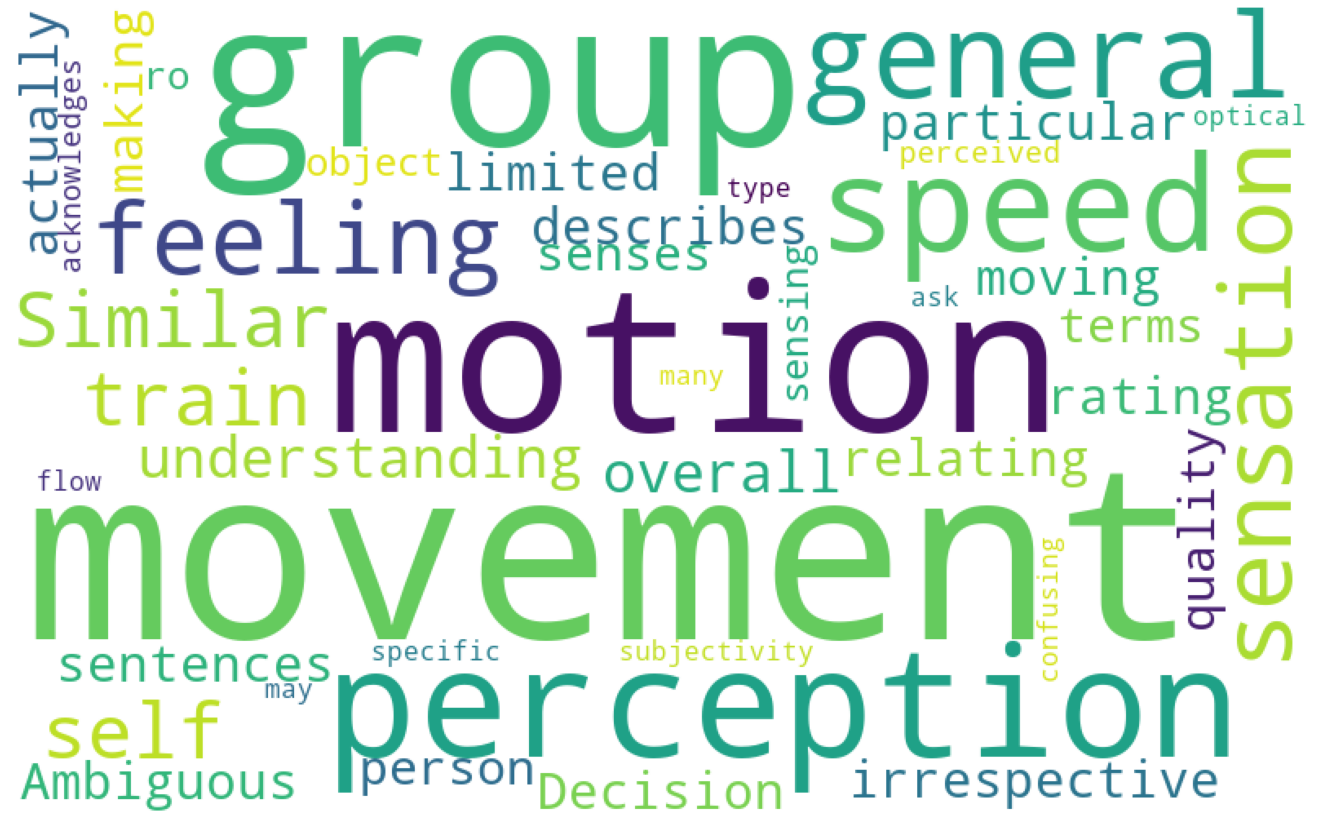

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(surveyData.Group_5))
wordfreq = wordcloud.words_
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
wordfreq = wordcloud.words_
wordfreq

{'Ambiguous': 0.16666666666666666,
 'Decision': 0.16666666666666666,
 'Similar': 0.3333333333333333,
 'acknowledges': 0.16666666666666666,
 'actually': 0.16666666666666666,
 'ask': 0.16666666666666666,
 'confusing': 0.16666666666666666,
 'describes': 0.16666666666666666,
 'feeling': 0.3333333333333333,
 'flow': 0.16666666666666666,
 'general': 0.5,
 'group': 0.6666666666666666,
 'irrespective': 0.16666666666666666,
 'limited': 0.16666666666666666,
 'making': 0.16666666666666666,
 'many': 0.16666666666666666,
 'may': 0.16666666666666666,
 'motion': 0.6666666666666666,
 'movement': 1.0,
 'moving': 0.16666666666666666,
 'object': 0.16666666666666666,
 'optical': 0.16666666666666666,
 'overall': 0.16666666666666666,
 'particular': 0.16666666666666666,
 'perceived': 0.16666666666666666,
 'perception': 0.6666666666666666,
 'person': 0.16666666666666666,
 'quality': 0.16666666666666666,
 'rating': 0.16666666666666666,
 'relating': 0.16666666666666666,
 'ro': 0.16666666666666666,
 'self': 0.33

# Modelling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = surveyData
data.head()

Participant_No  ...                                            Group_5
0               1  ...  This group has to do with your understanding o...
1               2  ...                                                NaN
2               3  ...                                                NaN
3               4  ...  This is about what movement you're actually fe...
4               5  ...                                                NaN

[5 rows x 28 columns]

In [ ]:
columns_to_drop=['Age', 'Gender', 'Level_of_English', 'Play_video_games', 'Use_VR_apps_with_whd']
data.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
columns_to_drop=['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5']
data.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
data.head()

Participant_No  S1  S2  S3  S4  S5  S6  ...  S11  S12  S13  S14  S15  S16  S17
0               1   4   4   2   3   3   3  ...    4    2    4    5    2    2    2
1               2   3   3   2   1   1   1  ...    3    2    3    2    2    2    2
2               3   2   2   3   1   1   1  ...    2    3    2    3    3    3    3
3               4   5   5   2   2   2   2  ...    3    3    3    4    1    1    1
4               5   2   2   1   1   1   1  ...    3    3    3    2    2    2    2

[5 rows x 18 columns]

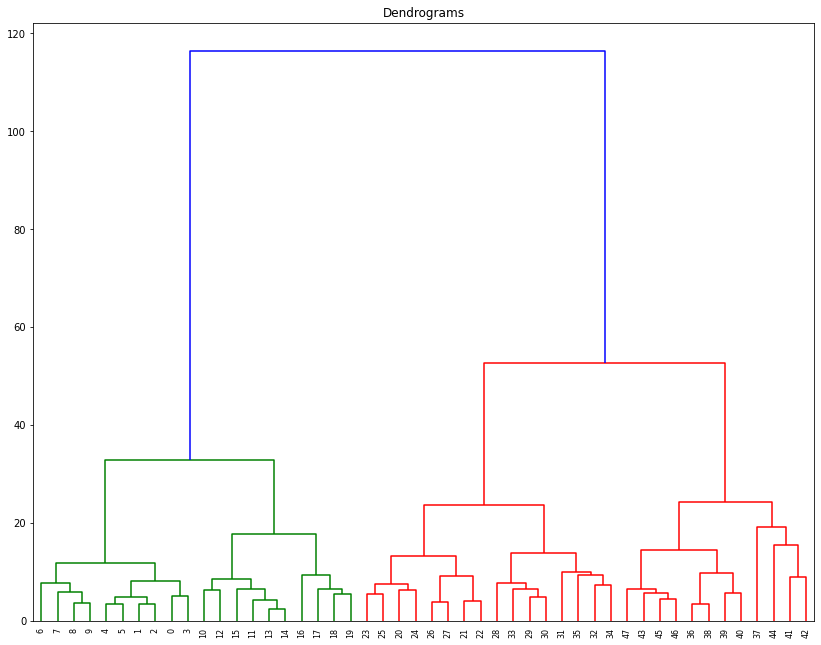

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14, 11))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

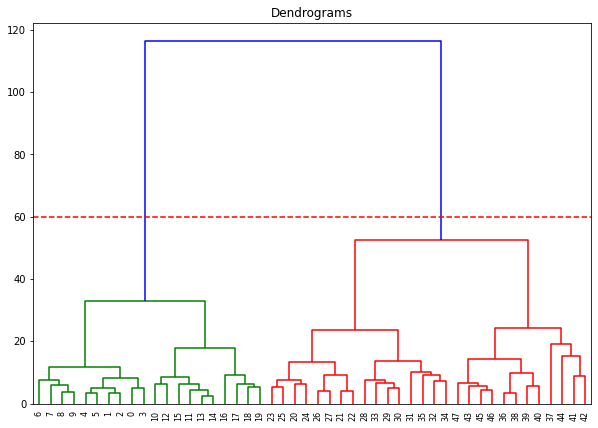

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.axhline(y=60, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 4, 4, 2, 2, 4,
       2, 4, 4, 4])